In [4]:
import pandas as pd

In [5]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
wine = pd.read_csv('winequalityN.csv')

In [7]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

# Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media

In [8]:
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [53]:
#Columnas numericas
cols_numeric = wine.loc[:, ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]

In [54]:
cols_numeric #No incluyo quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
#Evaluando si vale la pena estratificar por type

In [29]:
wine.loc[ : , ["type"]].value_counts()

type 
white    4898
red      1599
dtype: int64

In [113]:
wine.loc[ : , ["type"] ].value_counts() / wine.shape[0]

type 
white    0.753886
red      0.246114
dtype: float64

In [ ]:
#type y fixed acidity

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

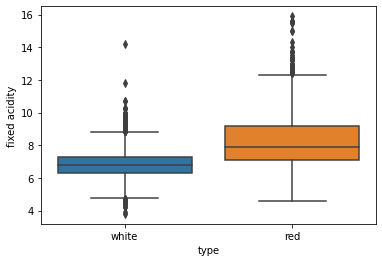

In [35]:
sns.boxplot( data=wine  , x="type" , y="fixed acidity" )

In [ ]:
#type y volatile acidity

<AxesSubplot:xlabel='type', ylabel='volatile acidity'>

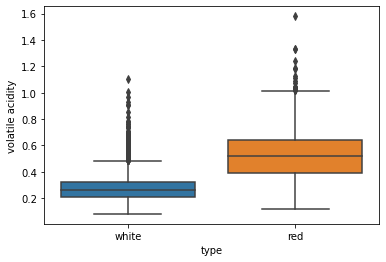

In [38]:
sns.boxplot( data=wine  , x="type" , y="volatile acidity" )

In [ ]:
#type y citric acid

<AxesSubplot:xlabel='type', ylabel='citric acid'>

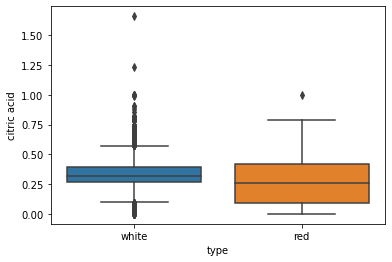

In [39]:
sns.boxplot( data=wine  , x="type" , y="citric acid" )

In [ ]:
#type y residual sugar

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

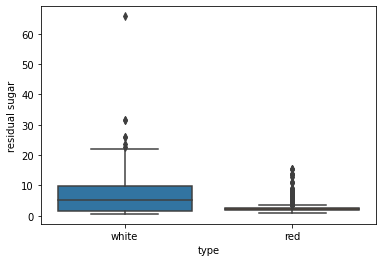

In [43]:
sns.boxplot( data=wine  , x="type" , y="residual sugar" )

In [ ]:
#type y chlorides

<AxesSubplot:xlabel='type', ylabel='chlorides'>

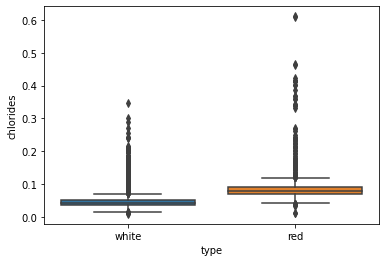

In [44]:
sns.boxplot( data=wine  , x="type" , y="chlorides" )

In [ ]:
#type y free sulfur dioxide

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

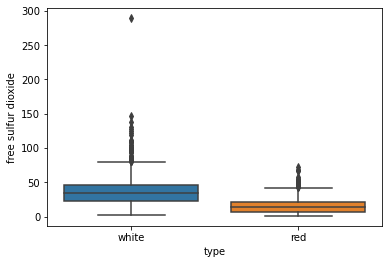

In [45]:
sns.boxplot( data=wine  , x="type" , y="free sulfur dioxide" )

In [ ]:
#type y total sulfur dioxide

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

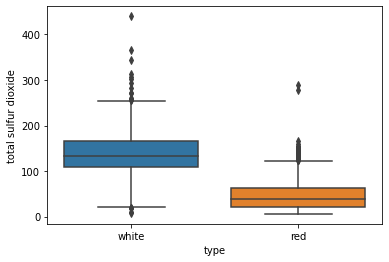

In [46]:
sns.boxplot( data=wine  , x="type" , y="total sulfur dioxide" )

In [ ]:
#type y density

<AxesSubplot:xlabel='type', ylabel='density'>

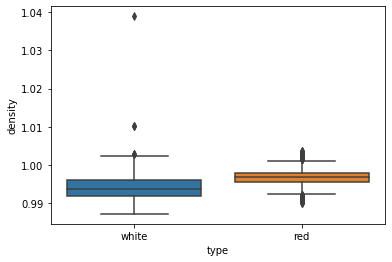

In [48]:
sns.boxplot( data=wine  , x="type" , y="density" )

In [ ]:
#type y pH

<AxesSubplot:xlabel='type', ylabel='pH'>

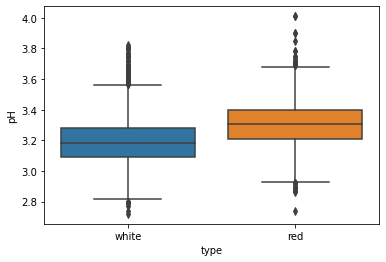

In [49]:
sns.boxplot( data=wine  , x="type" , y="pH" )

In [ ]:
#type y sulphates

<AxesSubplot:xlabel='type', ylabel='sulphates'>

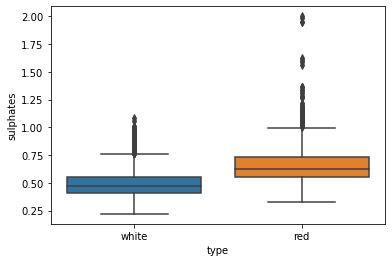

In [50]:
sns.boxplot( data=wine  , x="type" , y="sulphates" )

In [ ]:
#type y alcohol

<AxesSubplot:xlabel='type', ylabel='alcohol'>

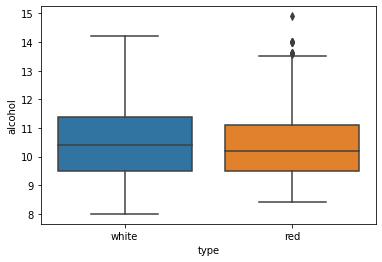

In [51]:
sns.boxplot( data=wine  , x="type" , y="alcohol" )

In [ ]:
#Vemos que vale la pena realizar estratificacion por type, trabajaremos 

In [ ]:
#Comenzare a hacer la limpieza de cada variable estratificando por type
#Las variables que limpiare son las que usare para el PCA el resto no las limpiare

In [152]:
cols_numeric

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [8]:
#Limpiando fixed acidity
FA = wine.loc[(wine['type'] == 'white') , ['fixed acidity'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3902ca190>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3902ca7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3902b6fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3902cacd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3902cafa0>],
 'means': []}

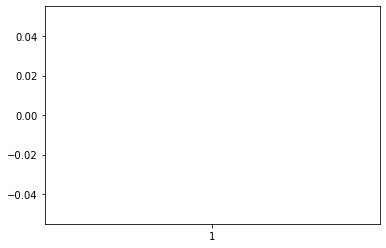

In [9]:
plt.boxplot(FA) #No genera ningun boxplot ya que tiene valores NaN (Solo limpiare las variables que usare en el PCA)

In [10]:
#verificando la estratificacion
FA = wine.loc[ (wine['alcohol'] == 9.9) & (wine['type'] == 'white') , ['fixed acidity'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d390a3e700>,
 'caps': [<matplotlib.lines.Line2D at 0x1d390a3eca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d390a3e430>],
 'medians': [<matplotlib.lines.Line2D at 0x1d390a4c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d390a4c550>],
 'means': []}

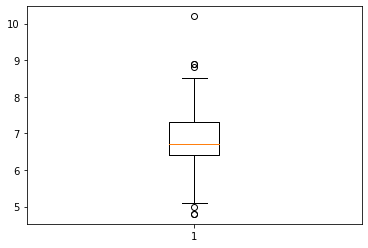

In [11]:
plt.boxplot(FA) #Vemos que genera el boxplot y sus valores atipicos.
#Pero dado que esta ya no es una estratificacion exclusiva de type no la tomare en cuenta y no la limpiaré.
#Esto mismo sucede con las demas variables que no generan el boxplot solo con type.

In [156]:
#Limpiando volatile acidity
VA = wine.loc[ (wine['type'] == 'white') , ['volatile acidity'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x2956b3a1e20>,
 'caps': [<matplotlib.lines.Line2D at 0x2956b3b0400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2956b3a1c70>],
 'medians': [<matplotlib.lines.Line2D at 0x2956b3b09a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2956b3b0c70>],
 'means': []}

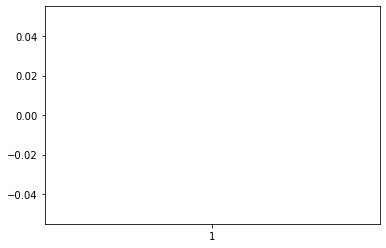

In [157]:
plt.boxplot(VA) #No genera ningun boxplot ya que tiene valores NaN 

In [168]:
#Limpiando citric acid
CA = wine.loc[ (wine['type'] == 'red') , ['citric acid'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x2956c55b8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2956c55be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2956c55b700>],
 'medians': [<matplotlib.lines.Line2D at 0x2956c569460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2956c569730>],
 'means': []}

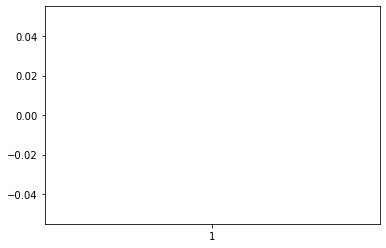

In [169]:
plt.boxplot(CA) #No genera ningun boxplot ya que tiene valores NaN 

In [9]:
#Limpiando residual sugar
RS = wine.loc[ (wine['type'] == 'red') , ['residual sugar'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x148b77122b0>,
 'caps': [<matplotlib.lines.Line2D at 0x148b7712910>,
 'boxes': [<matplotlib.lines.Line2D at 0x148b758afa0>],
 'medians': [<matplotlib.lines.Line2D at 0x148b7712df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x148b7e30100>],
 'means': []}

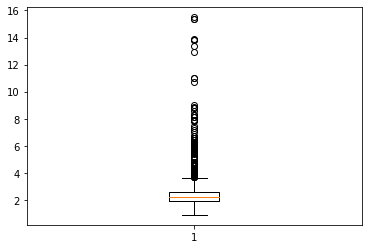

In [10]:
plt.boxplot(RS) #Solo genera el boxplot con type = red

In [11]:
q1 = np.quantile( RS , 0.25 )
q3 = np.quantile( RS , 0.75 )

In [12]:
np.median( RS ) 

2.2

In [13]:
np.quantile( RS , 0.5 ) #Igual que la media

2.2

In [14]:
## Inter quartile range
iqr = q3 - q1

In [15]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [16]:
#Values atipicos fuera de nuestros limites
RS.loc[ (RS['residual sugar'] > upper_bound) | (RS['residual sugar'] < lower_bound) , : ]

,residual sugar
4907,6.1
4909,6.1
4912,3.8
4913,3.9
4916,4.4
...,...
6450,3.7
6456,6.7
6472,13.9
6475,5.1


In [17]:
dfq1 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","residual sugar_q1"]

In [18]:
dfq3 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","residual sugar_q3"]

In [19]:
dfq2 =wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","residual sugar_q2"]

In [20]:
#Union de los df
RS_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

In [21]:
RS_iqr

,type,residual sugar_q1,residual sugar_q3,residual sugar_q2
0,red,1.9,2.6,2.2
1,white,1.7,9.9,5.2


In [22]:
#iqr del df
RS_iqr["iqr"] = RS_iqr.apply( lambda r: r["residual sugar_q3"] - r["residual sugar_q1"] , axis = 1)

In [23]:
#Limite superios e inferior
RS_iqr["upper"] = RS_iqr.apply( lambda r: ( r["residual sugar_q3"] + 1.5*r["iqr"] ) , axis = 1)
RS_iqr["lower"] = RS_iqr.apply( lambda r: ( r["residual sugar_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [24]:
RS_iqr.head(2)

,type,residual sugar_q1,residual sugar_q3,residual sugar_q2,iqr,upper,lower
0,red,1.9,2.6,2.2,0.7,3.65,0.85
1,white,1.7,9.9,5.2,8.2,22.20,-10.60


In [25]:
RS_t = wine.merge( RS_iqr , on=["type"] , how="left" ).copy()

In [26]:
RS_t

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar_q1,residual sugar_q3,residual sugar_q2,iqr,upper,lower
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1.7,9.9,5.2,8.2,22.20,-10.60
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.7,9.9,5.2,8.2,22.20,-10.60
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1.7,9.9,5.2,8.2,22.20,-10.60
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.7,9.9,5.2,8.2,22.20,-10.60
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.7,9.9,5.2,8.2,22.20,-10.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.9,2.6,2.2,0.7,3.65,0.85
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,1.9,2.6,2.2,0.7,3.65,0.85
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.9,2.6,2.2,0.7,3.65,0.85
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.9,2.6,2.2,0.7,3.65,0.85


In [27]:
#Funcion para reemplazar los valores atipicos

def getRealPrice(r):
    if ( r["residual sugar"] <= r["lower"] ) | ( r["residual sugar"] >= r["upper"] ):
        return r["residual sugar_q2"]
    else:
        return r["residual sugar"]

In [29]:
RS_t.apply( lambda r: getRealPrice(r) , axis = 1 )

0       20.7
1        1.6
2        6.9
3        8.5
4        8.5
        ... 
6492     2.0
6493     2.2
6494     2.3
6495     2.0
6496     3.6
Length: 6497, dtype: float64

In [30]:
RS_t["new_residual sugar"] = RS_t.apply( lambda r: getRealPrice(r) , axis = 1 )

In [31]:
RS_t.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar_q1,residual sugar_q3,residual sugar_q2,iqr,upper,lower,new_residual sugar
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1.7,9.9,5.2,8.2,22.2,-10.6,20.7
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.7,9.9,5.2,8.2,22.2,-10.6,1.6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1.7,9.9,5.2,8.2,22.2,-10.6,6.9
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.7,9.9,5.2,8.2,22.2,-10.6,8.5
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.7,9.9,5.2,8.2,22.2,-10.6,8.5


<AxesSubplot:xlabel='type', ylabel='new_residual sugar'>

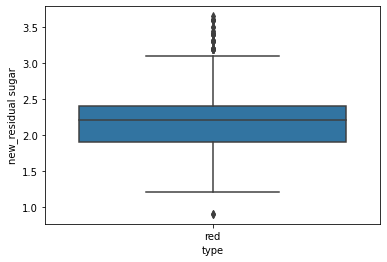

In [32]:
#Comparacion entre el nuevo residual sugar y el anterior
sns.boxplot( data=RS_t.loc[ (RS_t['type'] == 'red'), :] , x="type" , y="new_residual sugar" )

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

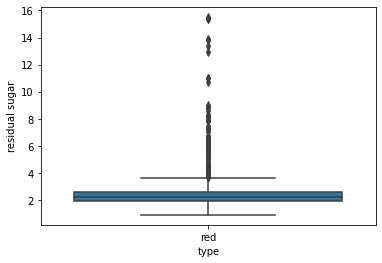

In [33]:
sns.boxplot( data=wine.loc[ (wine['type'] == 'red'), :] , x="type" , y="residual sugar" )

In [34]:
RS_F = RS_t.loc[: , ['type', "fixed acidity", "volatile acidity", "citric acid", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", 'quality', 'new_residual sugar']]

In [35]:
RS_F #Este DF tiene el nuevo Valor

,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar
0,white,7.0,0.270,0.36,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,20.7
1,white,6.3,0.300,0.34,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.6
2,white,8.1,0.280,0.40,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,6.9
3,white,7.2,0.230,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5
4,white,7.2,0.230,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.0
6493,red,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,2.2
6494,red,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2.3
6495,red,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2.0


In [36]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
#Limpiando chlorides
C = wine.loc[ (wine['type'] == 'red') , ['chlorides'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x148b7f5e820>,
 'caps': [<matplotlib.lines.Line2D at 0x148b7f5edf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x148b7f5e550>],
 'medians': [<matplotlib.lines.Line2D at 0x148b7f6a3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x148b7f6a6a0>],
 'means': []}

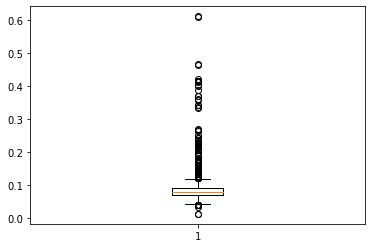

In [38]:
plt.boxplot(C) #Solo genera el boxplot con type = red

In [39]:
q1 = np.quantile( C , 0.25 )
q3 = np.quantile( C , 0.75 )

In [40]:
## Inter quartile range
iqr = q3 - q1

In [41]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [42]:
#Valores atipicos fuera de nuestros limites
C.loc[ (C['chlorides'] > upper_bound) | (C['chlorides'] < lower_bound) , : ]

,chlorides
4912,0.176
4913,0.170
4915,0.368
4917,0.341
4936,0.172
...,...
6374,0.205
6388,0.039
6456,0.235
6468,0.230


In [43]:
dfq1 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","chlorides_q1"]

In [44]:
dfq3 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","chlorides_q3"]

In [45]:
dfq2 =wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","chlorides_q2"]

In [46]:
#Union de los df
C_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

In [47]:
C_iqr

,type,chlorides_q1,chlorides_q3,chlorides_q2
0,red,0.070,0.09,0.079
1,white,0.036,0.05,0.043


In [48]:
#iqr del df
C_iqr["iqr"] = C_iqr.apply( lambda r: r["chlorides_q3"] - r["chlorides_q1"] , axis = 1)

In [49]:
#Limite superios e inferior
C_iqr["upper"] = C_iqr.apply( lambda r: ( r["chlorides_q3"] + 1.5*r["iqr"] ) , axis = 1)
C_iqr["lower"] = C_iqr.apply( lambda r: ( r["chlorides_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [50]:
C_iqr.head(2)

,type,chlorides_q1,chlorides_q3,chlorides_q2,iqr,upper,lower
0,red,0.070,0.09,0.079,0.020,0.120,0.040
1,white,0.036,0.05,0.043,0.014,0.071,0.015


In [51]:
C_t = RS_F.merge( C_iqr , on=["type"] , how="left" ).copy()

In [52]:
C_t

,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar,chlorides_q1,chlorides_q3,chlorides_q2,iqr,upper,lower
0,white,7.0,0.270,0.36,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,20.7,0.036,0.05,0.043,0.014,0.071,0.015
1,white,6.3,0.300,0.34,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.6,0.036,0.05,0.043,0.014,0.071,0.015
2,white,8.1,0.280,0.40,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,6.9,0.036,0.05,0.043,0.014,0.071,0.015
3,white,7.2,0.230,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.036,0.05,0.043,0.014,0.071,0.015
4,white,7.2,0.230,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.036,0.05,0.043,0.014,0.071,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.0,0.070,0.09,0.079,0.020,0.120,0.040
6493,red,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,2.2,0.070,0.09,0.079,0.020,0.120,0.040
6494,red,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2.3,0.070,0.09,0.079,0.020,0.120,0.040
6495,red,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2.0,0.070,0.09,0.079,0.020,0.120,0.040


In [53]:
#Funcion para reemplazar los valores atipicos

def getRealPrice(r):
    if ( r["chlorides"] <= r["lower"] ) | ( r["chlorides"] >= r["upper"] ):
        return r["chlorides_q2"]
    else:
        return r["chlorides"]

In [54]:
C_t.apply( lambda r: getRealPrice(r) , axis = 1 )

0       0.045
1       0.049
2       0.050
3       0.058
4       0.058
        ...  
6492    0.090
6493    0.062
6494    0.076
6495    0.075
6496    0.067
Length: 6497, dtype: float64

In [55]:
C_t["new_chlorides"] = C_t.apply( lambda r: getRealPrice(r) , axis = 1 )

In [56]:
C_t.head(5)

,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar,chlorides_q1,chlorides_q3,chlorides_q2,iqr,upper,lower,new_chlorides
0,white,7.0,0.27,0.36,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,20.7,0.036,0.05,0.043,0.014,0.071,0.015,0.045
1,white,6.3,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.6,0.036,0.05,0.043,0.014,0.071,0.015,0.049
2,white,8.1,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6.9,0.036,0.05,0.043,0.014,0.071,0.015,0.050
3,white,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,8.5,0.036,0.05,0.043,0.014,0.071,0.015,0.058
4,white,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,8.5,0.036,0.05,0.043,0.014,0.071,0.015,0.058


<AxesSubplot:xlabel='type', ylabel='new_chlorides'>

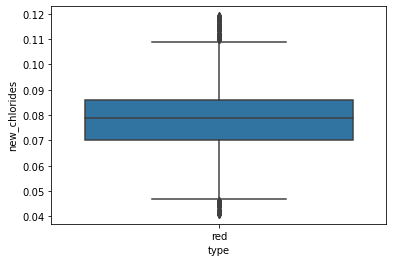

In [57]:
#Comparacion entre el nuevo chlorides y el anterior
sns.boxplot( data=C_t.loc[ (C_t['type'] == 'red'), :] , x="type" , y="new_chlorides" )

<AxesSubplot:xlabel='type', ylabel='chlorides'>

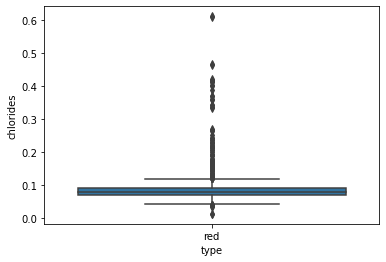

In [58]:
sns.boxplot( data=wine.loc[ (wine['type'] == 'red'), :] , x="type" , y="chlorides" )

In [59]:
C_F = C_t.loc[: , ['type', "fixed acidity", "volatile acidity", "citric acid", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", 'quality', 'new_residual sugar', 'new_chlorides']]

In [60]:
C_F #Este DF tiene el nuevo Valor

,type,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides
0,white,7.0,0.270,0.36,45.0,170.0,1.00100,3.00,0.45,8.8,6,20.7,0.045
1,white,6.3,0.300,0.34,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.6,0.049
2,white,8.1,0.280,0.40,30.0,97.0,0.99510,3.26,0.44,10.1,6,6.9,0.050
3,white,7.2,0.230,0.32,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.058
4,white,7.2,0.230,0.32,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.0,0.090
6493,red,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,NaN,11.2,6,2.2,0.062
6494,red,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0,6,2.3,0.076
6495,red,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2,5,2.0,0.075


In [61]:
#Limpiando free sulfur dioxide
FSD = wine.loc[ (wine['type'] == 'white') , ['free sulfur dioxide'] ]

In [ ]:
#Comenzamos con la estratificacion usando white

{'whiskers': [<matplotlib.lines.Line2D at 0x148b7fe86d0>,
 'caps': [<matplotlib.lines.Line2D at 0x148b7fe8c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x148b7fe8400>],
 'medians': [<matplotlib.lines.Line2D at 0x148b7ff3250>],
 'fliers': [<matplotlib.lines.Line2D at 0x148b7ff3520>],
 'means': []}

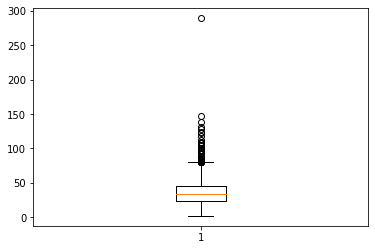

In [62]:
plt.boxplot(FSD) #Genera ambos boxplot

In [63]:
q1 = np.quantile( FSD , 0.25 )
q3 = np.quantile( FSD , 0.75 )

In [64]:
## Inter quartile range
iqr = q3 - q1

In [65]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [66]:
#Valores atipicos fuera de nuestros limites
FSD.loc[ (FSD['free sulfur dioxide'] > upper_bound) | (FSD['free sulfur dioxide'] < lower_bound) , : ]

,free sulfur dioxide
67,81.0
297,82.0
325,131.0
387,82.5
395,87.0
405,87.0
459,83.0
659,122.5
752,83.0
766,81.0


In [67]:
dfq1 = wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","free sulfur dioxide_q1"]

In [68]:
dfq3 = wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","free sulfur dioxide_q3"]

In [69]:
dfq2 =wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","free sulfur dioxide_q2"]

In [70]:
#Union de los df
FSD_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

In [71]:
FSD_iqr

,type,free sulfur dioxide_q1,free sulfur dioxide_q3,free sulfur dioxide_q2
0,red,7.0,21.0,14.0
1,white,23.0,46.0,34.0


In [72]:
#iqr del df
FSD_iqr["iqr"] = FSD_iqr.apply( lambda r: r["free sulfur dioxide_q3"] - r["free sulfur dioxide_q1"] , axis = 1)

In [73]:
#Limite superios e inferior
FSD_iqr["upper"] = FSD_iqr.apply( lambda r: ( r["free sulfur dioxide_q3"] + 1.5*r["iqr"] ) , axis = 1)
FSD_iqr["lower"] = FSD_iqr.apply( lambda r: ( r["free sulfur dioxide_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [74]:
FSD_iqr.head(2)

,type,free sulfur dioxide_q1,free sulfur dioxide_q3,free sulfur dioxide_q2,iqr,upper,lower
0,red,7.0,21.0,14.0,14.0,42.0,-14.0
1,white,23.0,46.0,34.0,23.0,80.5,-11.5


In [75]:
FSD_t = C_F.merge( FSD_iqr , on=["type"] , how="left" ).copy()

In [76]:
FSD_t

,type,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,free sulfur dioxide_q1,free sulfur dioxide_q3,free sulfur dioxide_q2,iqr,upper,lower
0,white,7.0,0.270,0.36,45.0,170.0,1.00100,3.00,0.45,8.8,6,20.7,0.045,23.0,46.0,34.0,23.0,80.5,-11.5
1,white,6.3,0.300,0.34,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.6,0.049,23.0,46.0,34.0,23.0,80.5,-11.5
2,white,8.1,0.280,0.40,30.0,97.0,0.99510,3.26,0.44,10.1,6,6.9,0.050,23.0,46.0,34.0,23.0,80.5,-11.5
3,white,7.2,0.230,0.32,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.058,23.0,46.0,34.0,23.0,80.5,-11.5
4,white,7.2,0.230,0.32,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.058,23.0,46.0,34.0,23.0,80.5,-11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.0,0.090,7.0,21.0,14.0,14.0,42.0,-14.0
6493,red,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,NaN,11.2,6,2.2,0.062,7.0,21.0,14.0,14.0,42.0,-14.0
6494,red,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0,6,2.3,0.076,7.0,21.0,14.0,14.0,42.0,-14.0
6495,red,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2,5,2.0,0.075,7.0,21.0,14.0,14.0,42.0,-14.0


In [77]:
#Funcion para reemplazar los valores atipicos

def getRealPrice(r):
    if ( r["free sulfur dioxide"] <= r["lower"] ) | ( r["free sulfur dioxide"] >= r["upper"] ):
        return r["free sulfur dioxide_q2"]
    else:
        return r["free sulfur dioxide"]

In [78]:
FSD_t.apply( lambda r: getRealPrice(r) , axis = 1 )

0       45.0
1       14.0
2       30.0
3       47.0
4       47.0
        ... 
6492    32.0
6493    39.0
6494    29.0
6495    32.0
6496    18.0
Length: 6497, dtype: float64

In [79]:
FSD_t["new_free sulfur dioxide"] = FSD_t.apply( lambda r: getRealPrice(r) , axis = 1 )

In [80]:
FSD_t.head(5)

,type,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,free sulfur dioxide_q1,free sulfur dioxide_q3,free sulfur dioxide_q2,iqr,upper,lower,new_free sulfur dioxide
0,white,7.0,0.27,0.36,45.0,170.0,1.0010,3.00,0.45,8.8,6,20.7,0.045,23.0,46.0,34.0,23.0,80.5,-11.5,45.0
1,white,6.3,0.30,0.34,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.6,0.049,23.0,46.0,34.0,23.0,80.5,-11.5,14.0
2,white,8.1,0.28,0.40,30.0,97.0,0.9951,3.26,0.44,10.1,6,6.9,0.050,23.0,46.0,34.0,23.0,80.5,-11.5,30.0
3,white,7.2,0.23,0.32,47.0,186.0,0.9956,3.19,0.40,9.9,6,8.5,0.058,23.0,46.0,34.0,23.0,80.5,-11.5,47.0
4,white,7.2,0.23,0.32,47.0,186.0,0.9956,3.19,0.40,9.9,6,8.5,0.058,23.0,46.0,34.0,23.0,80.5,-11.5,47.0


<AxesSubplot:xlabel='type', ylabel='new_free sulfur dioxide'>

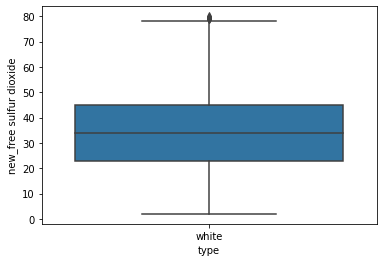

In [81]:
#Comparacion entre el nuevo free sulfur dioxide y el anterior
sns.boxplot( data=FSD_t.loc[ (FSD_t['type'] == 'white'), :] , x="type" , y="new_free sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

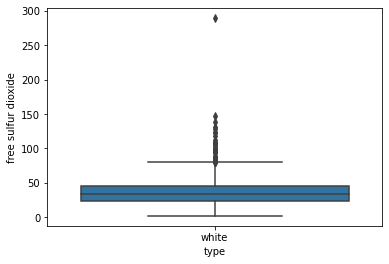

In [82]:
sns.boxplot( data=wine.loc[ (wine['type'] == 'white'), :] , x="type" , y="free sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='new_free sulfur dioxide'>

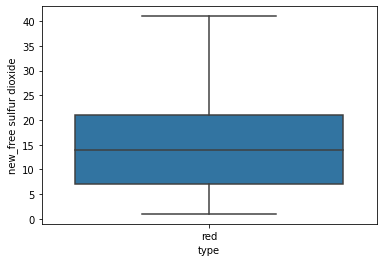

In [83]:
#Como podemos ver al haber realizado esta estratificacion tambien afeto a los type=red por lo que ya no hay que limpiar mas.
sns.boxplot( data=FSD_t.loc[ (FSD_t['type'] == 'red'), :] , x="type" , y="new_free sulfur dioxide" )

In [84]:
FSD_F = FSD_t.loc[: , ['type', "fixed acidity", "volatile acidity", "citric acid", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", 'quality', 'new_residual sugar', 'new_chlorides', "new_free sulfur dioxide"]]

In [85]:
FSD_F #Este DF tiene el nuevo Valor

,type,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide
0,white,7.0,0.270,0.36,170.0,1.00100,3.00,0.45,8.8,6,20.7,0.045,45.0
1,white,6.3,0.300,0.34,132.0,0.99400,3.30,0.49,9.5,6,1.6,0.049,14.0
2,white,8.1,0.280,0.40,97.0,0.99510,3.26,0.44,10.1,6,6.9,0.050,30.0
3,white,7.2,0.230,0.32,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.058,47.0
4,white,7.2,0.230,0.32,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.058,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,44.0,0.99490,3.45,0.58,10.5,5,2.0,0.090,32.0
6493,red,5.9,0.550,0.10,51.0,0.99512,3.52,NaN,11.2,6,2.2,0.062,39.0
6494,red,6.3,0.510,0.13,40.0,0.99574,3.42,0.75,11.0,6,2.3,0.076,29.0
6495,red,5.9,0.645,0.12,44.0,0.99547,3.57,0.71,10.2,5,2.0,0.075,32.0


In [86]:
#Limpiando total sulfur dioxide
TSD = wine.loc[ (wine['type'] == 'white') , ['total sulfur dioxide'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x148b8118670>,
 'caps': [<matplotlib.lines.Line2D at 0x148b8118c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x148b81183a0>],
 'medians': [<matplotlib.lines.Line2D at 0x148b81261f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x148b81264c0>],
 'means': []}

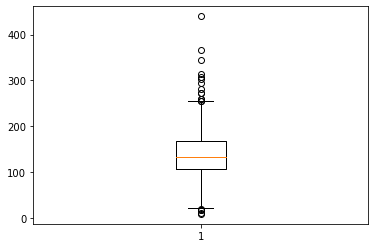

In [87]:
plt.boxplot(TSD) #Genera ambos boxplot

In [88]:
q1 = np.quantile( TSD , 0.25 )
q3 = np.quantile( TSD , 0.75 )

In [89]:
## Inter quartile range
iqr = q3 - q1

In [90]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [91]:
#Valores atipicos fuera de nuestros limites
TSD.loc[ (TSD['total sulfur dioxide'] > upper_bound) | (TSD['total sulfur dioxide'] < lower_bound) , : ]

,total sulfur dioxide
227,272.0
325,313.0
387,260.0
740,19.0
1417,366.5
1931,307.5
1940,256.0
1942,256.0
2127,344.0
2378,282.0


In [92]:
dfq1 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","total sulfur dioxide_q1"]

In [93]:
dfq3 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","total sulfur dioxide_q3"]

In [94]:
dfq2 =wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","total sulfur dioxide_q2"]

In [95]:
#Union de los df
TSD_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

In [96]:
TSD_iqr

,type,total sulfur dioxide_q1,total sulfur dioxide_q3,total sulfur dioxide_q2
0,red,22.0,62.0,38.0
1,white,108.0,167.0,134.0


In [97]:
#iqr del df
TSD_iqr["iqr"] = TSD_iqr.apply( lambda r: r["total sulfur dioxide_q3"] - r["total sulfur dioxide_q1"] , axis = 1)

In [98]:
#Limite superios e inferior
TSD_iqr["upper"] = TSD_iqr.apply( lambda r: ( r["total sulfur dioxide_q3"] + 1.5*r["iqr"] ) , axis = 1)
TSD_iqr["lower"] = TSD_iqr.apply( lambda r: ( r["total sulfur dioxide_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [99]:
FSD_iqr.head(2)

,type,free sulfur dioxide_q1,free sulfur dioxide_q3,free sulfur dioxide_q2,iqr,upper,lower
0,red,7.0,21.0,14.0,14.0,42.0,-14.0
1,white,23.0,46.0,34.0,23.0,80.5,-11.5


In [100]:
TSD_t = FSD_F.merge( TSD_iqr , on=["type"] , how="left" ).copy()

In [101]:
FSD_t

,type,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,free sulfur dioxide_q1,free sulfur dioxide_q3,free sulfur dioxide_q2,iqr,upper,lower,new_free sulfur dioxide
0,white,7.0,0.270,0.36,45.0,170.0,1.00100,3.00,0.45,8.8,6,20.7,0.045,23.0,46.0,34.0,23.0,80.5,-11.5,45.0
1,white,6.3,0.300,0.34,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.6,0.049,23.0,46.0,34.0,23.0,80.5,-11.5,14.0
2,white,8.1,0.280,0.40,30.0,97.0,0.99510,3.26,0.44,10.1,6,6.9,0.050,23.0,46.0,34.0,23.0,80.5,-11.5,30.0
3,white,7.2,0.230,0.32,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.058,23.0,46.0,34.0,23.0,80.5,-11.5,47.0
4,white,7.2,0.230,0.32,47.0,186.0,0.99560,3.19,0.40,9.9,6,8.5,0.058,23.0,46.0,34.0,23.0,80.5,-11.5,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.0,0.090,7.0,21.0,14.0,14.0,42.0,-14.0,32.0
6493,red,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,NaN,11.2,6,2.2,0.062,7.0,21.0,14.0,14.0,42.0,-14.0,39.0
6494,red,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0,6,2.3,0.076,7.0,21.0,14.0,14.0,42.0,-14.0,29.0
6495,red,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2,5,2.0,0.075,7.0,21.0,14.0,14.0,42.0,-14.0,32.0


In [102]:
#Funcion para reemplazar los valores atipicos

def getRealPrice(r):
    if ( r["total sulfur dioxide"] <= r["lower"] ) | ( r["total sulfur dioxide"] >= r["upper"] ):
        return r["total sulfur dioxide_q2"]
    else:
        return r["total sulfur dioxide"]

In [103]:
TSD_t.apply( lambda r: getRealPrice(r) , axis = 1 )

0       170.0
1       132.0
2        97.0
3       186.0
4       186.0
        ...  
6492     44.0
6493     51.0
6494     40.0
6495     44.0
6496     42.0
Length: 6497, dtype: float64

In [104]:
TSD_t["new_total sulfur dioxide"] = TSD_t.apply( lambda r: getRealPrice(r) , axis = 1 )

In [105]:
TSD_t.head(5)

,type,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,total sulfur dioxide_q1,total sulfur dioxide_q3,total sulfur dioxide_q2,iqr,upper,lower,new_total sulfur dioxide
0,white,7.0,0.27,0.36,170.0,1.0010,3.00,0.45,8.8,6,20.7,0.045,45.0,108.0,167.0,134.0,59.0,255.5,19.5,170.0
1,white,6.3,0.30,0.34,132.0,0.9940,3.30,0.49,9.5,6,1.6,0.049,14.0,108.0,167.0,134.0,59.0,255.5,19.5,132.0
2,white,8.1,0.28,0.40,97.0,0.9951,3.26,0.44,10.1,6,6.9,0.050,30.0,108.0,167.0,134.0,59.0,255.5,19.5,97.0
3,white,7.2,0.23,0.32,186.0,0.9956,3.19,0.40,9.9,6,8.5,0.058,47.0,108.0,167.0,134.0,59.0,255.5,19.5,186.0
4,white,7.2,0.23,0.32,186.0,0.9956,3.19,0.40,9.9,6,8.5,0.058,47.0,108.0,167.0,134.0,59.0,255.5,19.5,186.0


<AxesSubplot:xlabel='type', ylabel='new_total sulfur dioxide'>

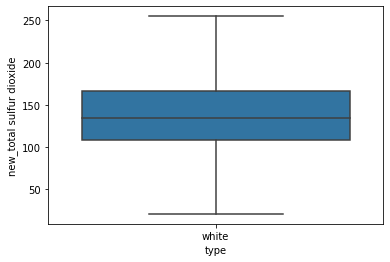

In [106]:
#Comparacion entre el nuevo total sulfur dioxide y el anterior
sns.boxplot( data=TSD_t.loc[ (TSD_t['type'] == 'white'), :] , x="type" , y="new_total sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

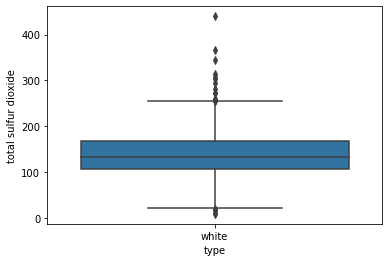

In [107]:
sns.boxplot( data=wine.loc[ (wine['type'] == 'white'), :] , x="type" , y="total sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='new_total sulfur dioxide'>

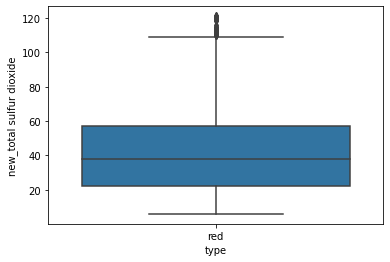

In [108]:
#Como podemos ver al haber realizado esta estratificacion tambien afeto a los type=red por lo que ya no hay que limpiar mas.
sns.boxplot( data=TSD_t.loc[ (TSD_t['type'] == 'red'), :] , x="type" , y="new_total sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

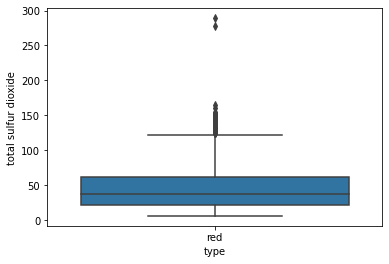

In [109]:
#Este es el type=red original
sns.boxplot( data=wine.loc[ (wine['type'] == 'red'), :] , x="type" , y="total sulfur dioxide" )

In [110]:
TSD_F = TSD_t.loc[: , ['type', "fixed acidity", "volatile acidity", "citric acid", "density", "pH", "sulphates", "alcohol", 'quality', 'new_residual sugar', 'new_chlorides', "new_free sulfur dioxide", "new_total sulfur dioxide"]]

In [111]:
TSD_F #Este DF tiene el nuevo Valor

,type,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide
0,white,7.0,0.270,0.36,1.00100,3.00,0.45,8.8,6,20.7,0.045,45.0,170.0
1,white,6.3,0.300,0.34,0.99400,3.30,0.49,9.5,6,1.6,0.049,14.0,132.0
2,white,8.1,0.280,0.40,0.99510,3.26,0.44,10.1,6,6.9,0.050,30.0,97.0
3,white,7.2,0.230,0.32,0.99560,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0
4,white,7.2,0.230,0.32,0.99560,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,0.99490,3.45,0.58,10.5,5,2.0,0.090,32.0,44.0
6493,red,5.9,0.550,0.10,0.99512,3.52,NaN,11.2,6,2.2,0.062,39.0,51.0
6494,red,6.3,0.510,0.13,0.99574,3.42,0.75,11.0,6,2.3,0.076,29.0,40.0
6495,red,5.9,0.645,0.12,0.99547,3.57,0.71,10.2,5,2.0,0.075,32.0,44.0


In [112]:
#Limpiando density
D = wine.loc[ (wine['type'] == 'red') , ['density'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x148b92dea00>,
 'caps': [<matplotlib.lines.Line2D at 0x148b92defa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x148b92de730>],
 'medians': [<matplotlib.lines.Line2D at 0x148b92ee580>],
 'fliers': [<matplotlib.lines.Line2D at 0x148b92ee850>],
 'means': []}

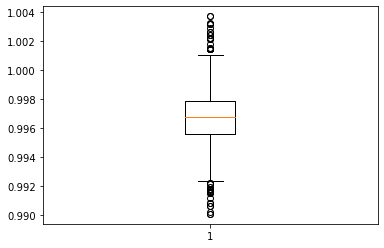

In [113]:
plt.boxplot(D) #Genera ambos boxplot

In [114]:
q1 = np.quantile( D , 0.25 )
q3 = np.quantile( D , 0.75 )

In [115]:
## Inter quartile range
iqr = q3 - q1

In [116]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [117]:
#Valores atipicos fuera de nuestros limites
D.loc[ (D['density'] > upper_bound) | (D['density'] < lower_bound) , : ]

,density
5040,0.99160
5042,0.99160
5192,1.00140
5222,1.00150
5223,1.00150
5251,1.00180
5252,0.99120
5262,1.00220
5264,1.00220
5272,1.00140


In [118]:
dfq1 = wine.loc[ : , ["type","density"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","density_q1"]

In [119]:
dfq3 = wine.loc[ : , ["type","density"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","density_q3"]

In [120]:
dfq2 =wine.loc[ : , ["type","density"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","density_q2"]

In [121]:
#Union de los df
D_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

In [122]:
D_iqr

,type,density_q1,density_q3,density_q2
0,red,0.995600,0.997835,0.99675
1,white,0.991723,0.996100,0.99374


In [123]:
#iqr del df
D_iqr["iqr"] = D_iqr.apply( lambda r: r["density_q3"] - r["density_q1"] , axis = 1)

In [124]:
#Limite superios e inferior
D_iqr["upper"] = D_iqr.apply( lambda r: ( r["density_q3"] + 1.5*r["iqr"] ) , axis = 1)
D_iqr["lower"] = D_iqr.apply( lambda r: ( r["density_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [125]:
D_iqr.head(2)

,type,density_q1,density_q3,density_q2,iqr,upper,lower
0,red,0.995600,0.997835,0.99675,0.002235,1.001187,0.992248
1,white,0.991723,0.996100,0.99374,0.004377,1.002666,0.985156


In [126]:
D_t = TSD_F.merge( D_iqr , on=["type"] , how="left" ).copy()

In [127]:
D_t

,type,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,density_q1,density_q3,density_q2,iqr,upper,lower
0,white,7.0,0.270,0.36,1.00100,3.00,0.45,8.8,6,20.7,0.045,45.0,170.0,0.991723,0.996100,0.99374,0.004377,1.002666,0.985156
1,white,6.3,0.300,0.34,0.99400,3.30,0.49,9.5,6,1.6,0.049,14.0,132.0,0.991723,0.996100,0.99374,0.004377,1.002666,0.985156
2,white,8.1,0.280,0.40,0.99510,3.26,0.44,10.1,6,6.9,0.050,30.0,97.0,0.991723,0.996100,0.99374,0.004377,1.002666,0.985156
3,white,7.2,0.230,0.32,0.99560,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.991723,0.996100,0.99374,0.004377,1.002666,0.985156
4,white,7.2,0.230,0.32,0.99560,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.991723,0.996100,0.99374,0.004377,1.002666,0.985156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,0.99490,3.45,0.58,10.5,5,2.0,0.090,32.0,44.0,0.995600,0.997835,0.99675,0.002235,1.001187,0.992248
6493,red,5.9,0.550,0.10,0.99512,3.52,NaN,11.2,6,2.2,0.062,39.0,51.0,0.995600,0.997835,0.99675,0.002235,1.001187,0.992248
6494,red,6.3,0.510,0.13,0.99574,3.42,0.75,11.0,6,2.3,0.076,29.0,40.0,0.995600,0.997835,0.99675,0.002235,1.001187,0.992248
6495,red,5.9,0.645,0.12,0.99547,3.57,0.71,10.2,5,2.0,0.075,32.0,44.0,0.995600,0.997835,0.99675,0.002235,1.001187,0.992248


In [128]:
#Funcion para reemplazar los valores atipicos

def getRealPrice(r):
    if ( r["density"] <= r["lower"] ) | ( r["density"] >= r["upper"] ):
        return r["density_q2"]
    else:
        return r["density"]

In [129]:
D_t.apply( lambda r: getRealPrice(r) , axis = 1 )

0       1.00100
1       0.99400
2       0.99510
3       0.99560
4       0.99560
         ...   
6492    0.99490
6493    0.99512
6494    0.99574
6495    0.99547
6496    0.99549
Length: 6497, dtype: float64

In [130]:
D_t["new_density"] = D_t.apply( lambda r: getRealPrice(r) , axis = 1 )

In [131]:
D_t.head(5)

,type,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,density_q1,density_q3,density_q2,iqr,upper,lower,new_density
0,white,7.0,0.27,0.36,1.0010,3.00,0.45,8.8,6,20.7,0.045,45.0,170.0,0.991723,0.9961,0.99374,0.004377,1.002666,0.985156,1.0010
1,white,6.3,0.30,0.34,0.9940,3.30,0.49,9.5,6,1.6,0.049,14.0,132.0,0.991723,0.9961,0.99374,0.004377,1.002666,0.985156,0.9940
2,white,8.1,0.28,0.40,0.9951,3.26,0.44,10.1,6,6.9,0.050,30.0,97.0,0.991723,0.9961,0.99374,0.004377,1.002666,0.985156,0.9951
3,white,7.2,0.23,0.32,0.9956,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.991723,0.9961,0.99374,0.004377,1.002666,0.985156,0.9956
4,white,7.2,0.23,0.32,0.9956,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.991723,0.9961,0.99374,0.004377,1.002666,0.985156,0.9956


<AxesSubplot:xlabel='type', ylabel='new_density'>

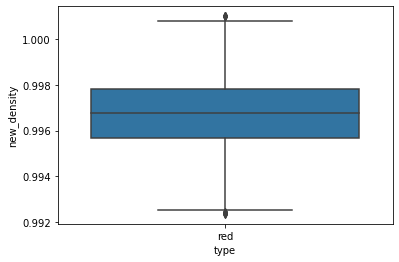

In [132]:
#Comparacion entre el nuevo total sulfur dioxide y el anterior
sns.boxplot( data=D_t.loc[ (D_t['type'] == 'red'), :] , x="type" , y="new_density" )

<AxesSubplot:xlabel='type', ylabel='density'>

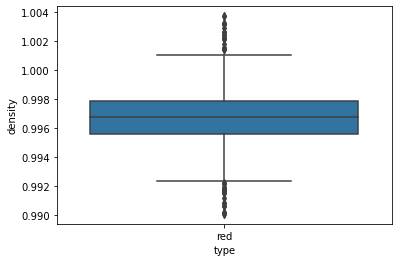

In [133]:
sns.boxplot( data=wine.loc[ (wine['type'] == 'red'), :] , x="type" , y="density" )

<AxesSubplot:xlabel='type', ylabel='new_density'>

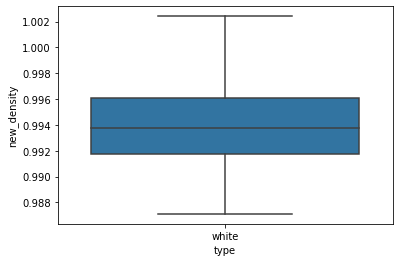

In [134]:
#Como podemos ver al haber realizado esta estratificacion tambien afeto a los type=white por lo que ya no hay que limpiar mas.
sns.boxplot( data=D_t.loc[ (D_t['type'] == 'white'), :] , x="type" , y="new_density" )

<AxesSubplot:xlabel='type', ylabel='density'>

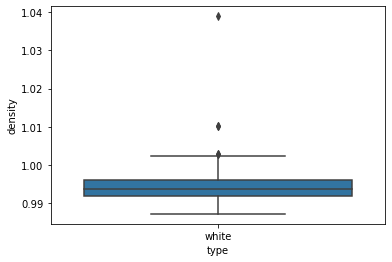

In [135]:
#Este es el type=red original
sns.boxplot( data=wine.loc[ (wine['type'] == 'white'), :] , x="type" , y="density" )

In [136]:
D_F = D_t.loc[: , ['type', "fixed acidity", "volatile acidity", "citric acid", "pH", "sulphates", "alcohol", 'quality', 'new_residual sugar', 'new_chlorides', "new_free sulfur dioxide", "new_total sulfur dioxide", "new_density"]]

In [137]:
D_F #Este DF tiene el nuevo Valor

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density
0,white,7.0,0.270,0.36,3.00,0.45,8.8,6,20.7,0.045,45.0,170.0,1.00100
1,white,6.3,0.300,0.34,3.30,0.49,9.5,6,1.6,0.049,14.0,132.0,0.99400
2,white,8.1,0.280,0.40,3.26,0.44,10.1,6,6.9,0.050,30.0,97.0,0.99510
3,white,7.2,0.230,0.32,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.99560
4,white,7.2,0.230,0.32,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.99560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,10.5,5,2.0,0.090,32.0,44.0,0.99490
6493,red,5.9,0.550,0.10,3.52,NaN,11.2,6,2.2,0.062,39.0,51.0,0.99512
6494,red,6.3,0.510,0.13,3.42,0.75,11.0,6,2.3,0.076,29.0,40.0,0.99574
6495,red,5.9,0.645,0.12,3.57,0.71,10.2,5,2.0,0.075,32.0,44.0,0.99547


In [205]:
#Limpiando pH
PH = wine.loc[ (wine['type'] == 'white') , ['pH'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x2956cc581c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2956cc58760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2956cc47eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2956cc58d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2956cc58fd0>],
 'means': []}

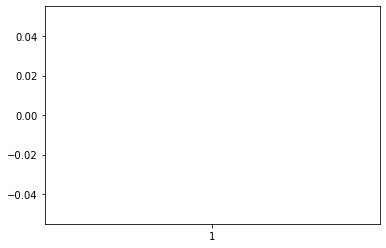

In [206]:
plt.boxplot(PH) #No genera ningun boxplot ya que tiene valores NaN 

In [209]:
#Limpiando sulphates
S = wine.loc[ (wine['type'] == 'red') , ['sulphates'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x2956dce08b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2956dce0e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2956dce05e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2956dcf0430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2956dcf0700>],
 'means': []}

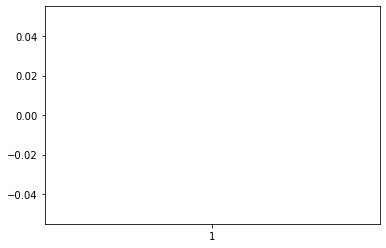

In [210]:
plt.boxplot(S) #No genera ningun boxplot ya que tiene valores NaN 

In [138]:
#Limpiando alcohol
A = wine.loc[ (wine['type'] == 'red') , ['alcohol'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x148b955b730>,
 'caps': [<matplotlib.lines.Line2D at 0x148b955bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x148b955b430>],
 'medians': [<matplotlib.lines.Line2D at 0x148b95672b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x148b9567580>],
 'means': []}

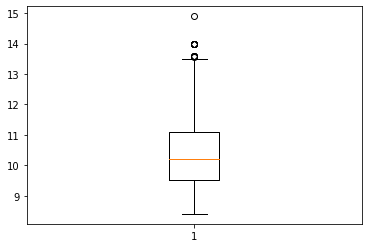

In [139]:
plt.boxplot(A) #Genera ambos bloxplot pero solo red tiene valores atipicos.

In [140]:
q1 = np.quantile( A , 0.25 )
q3 = np.quantile( A , 0.75 )

In [141]:
np.median( A ) #Media

10.2

In [142]:
## Inter quartile range
iqr = q3 - q1

In [143]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [144]:
#Valores atipicos fuera de nuestros limites
A.loc[ (A['alcohol'] > upper_bound) | (A['alcohol'] < lower_bound) , : ]

,alcohol
5040,14.000000
5042,14.000000
5365,14.000000
5486,14.000000
5550,14.900000
5719,14.000000
6012,13.600000
6030,13.600000
6126,13.600000
6167,14.000000


In [145]:
dfq1 = wine.loc[ : , ["type","alcohol"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","alcohol_q1"]

In [146]:
dfq3 = wine.loc[ : , ["type","alcohol"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","alcohol_q3"]

In [147]:
dfq2 =wine.loc[ : , ["type","alcohol"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","alcohol_q2"]

In [148]:
#Union de los df
A_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

In [149]:
A_iqr

,type,alcohol_q1,alcohol_q3,alcohol_q2
0,red,9.5,11.1,10.2
1,white,9.5,11.4,10.4


In [150]:
#iqr del df
A_iqr["iqr"] = A_iqr.apply( lambda r: r["alcohol_q3"] - r["alcohol_q1"] , axis = 1)

In [151]:
#Limite superios e inferior
A_iqr["upper"] = A_iqr.apply( lambda r: ( r["alcohol_q3"] + 1.5*r["iqr"] ) , axis = 1)
A_iqr["lower"] = A_iqr.apply( lambda r: ( r["alcohol_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [152]:
A_iqr.head(2)

,type,alcohol_q1,alcohol_q3,alcohol_q2,iqr,upper,lower
0,red,9.5,11.1,10.2,1.6,13.50,7.10
1,white,9.5,11.4,10.4,1.9,14.25,6.65


In [153]:
A_t = D_F.merge( A_iqr , on=["type"] , how="left" ).copy()

In [154]:
A_t

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density,alcohol_q1,alcohol_q3,alcohol_q2,iqr,upper,lower
0,white,7.0,0.270,0.36,3.00,0.45,8.8,6,20.7,0.045,45.0,170.0,1.00100,9.5,11.4,10.4,1.9,14.25,6.65
1,white,6.3,0.300,0.34,3.30,0.49,9.5,6,1.6,0.049,14.0,132.0,0.99400,9.5,11.4,10.4,1.9,14.25,6.65
2,white,8.1,0.280,0.40,3.26,0.44,10.1,6,6.9,0.050,30.0,97.0,0.99510,9.5,11.4,10.4,1.9,14.25,6.65
3,white,7.2,0.230,0.32,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.99560,9.5,11.4,10.4,1.9,14.25,6.65
4,white,7.2,0.230,0.32,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.99560,9.5,11.4,10.4,1.9,14.25,6.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,10.5,5,2.0,0.090,32.0,44.0,0.99490,9.5,11.1,10.2,1.6,13.50,7.10
6493,red,5.9,0.550,0.10,3.52,NaN,11.2,6,2.2,0.062,39.0,51.0,0.99512,9.5,11.1,10.2,1.6,13.50,7.10
6494,red,6.3,0.510,0.13,3.42,0.75,11.0,6,2.3,0.076,29.0,40.0,0.99574,9.5,11.1,10.2,1.6,13.50,7.10
6495,red,5.9,0.645,0.12,3.57,0.71,10.2,5,2.0,0.075,32.0,44.0,0.99547,9.5,11.1,10.2,1.6,13.50,7.10


In [155]:
#Funcion para reemplazar los valores atipicos

def getRealPrice(r):
    if ( r["alcohol"] <= r["lower"] ) | ( r["alcohol"] >= r["upper"] ):
        return r["alcohol_q2"]
    else:
        return r["alcohol"]

In [156]:
A_t.apply( lambda r: getRealPrice(r) , axis = 1 )

0        8.8
1        9.5
2       10.1
3        9.9
4        9.9
        ... 
6492    10.5
6493    11.2
6494    11.0
6495    10.2
6496    11.0
Length: 6497, dtype: float64

In [157]:
A_t["new_alcohol"] = A_t.apply( lambda r: getRealPrice(r) , axis = 1 )

In [158]:
A_t.head(5)

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,alcohol,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density,alcohol_q1,alcohol_q3,alcohol_q2,iqr,upper,lower,new_alcohol
0,white,7.0,0.27,0.36,3.00,0.45,8.8,6,20.7,0.045,45.0,170.0,1.0010,9.5,11.4,10.4,1.9,14.25,6.65,8.8
1,white,6.3,0.30,0.34,3.30,0.49,9.5,6,1.6,0.049,14.0,132.0,0.9940,9.5,11.4,10.4,1.9,14.25,6.65,9.5
2,white,8.1,0.28,0.40,3.26,0.44,10.1,6,6.9,0.050,30.0,97.0,0.9951,9.5,11.4,10.4,1.9,14.25,6.65,10.1
3,white,7.2,0.23,0.32,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.9956,9.5,11.4,10.4,1.9,14.25,6.65,9.9
4,white,7.2,0.23,0.32,3.19,0.40,9.9,6,8.5,0.058,47.0,186.0,0.9956,9.5,11.4,10.4,1.9,14.25,6.65,9.9


<AxesSubplot:xlabel='type', ylabel='new_alcohol'>

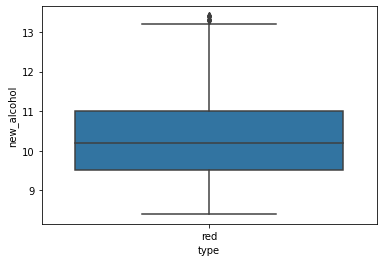

In [159]:
#Comparacion entre el nuevo total sulfur dioxide y el anterior
sns.boxplot( data=A_t.loc[ (A_t['type'] == 'red'), :] , x="type" , y="new_alcohol" )

<AxesSubplot:xlabel='type', ylabel='alcohol'>

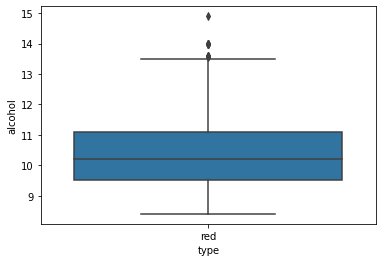

In [160]:
sns.boxplot( data=wine.loc[ (wine['type'] == 'red'), :] , x="type" , y="alcohol" )

In [161]:
A_F = A_t.loc[: , ['type', "fixed acidity", "volatile acidity", "citric acid", "pH", "sulphates", 'quality', 'new_residual sugar', 'new_chlorides', "new_free sulfur dioxide", "new_total sulfur dioxide", "new_density", "new_alcohol"]]

In [162]:
A_F #Este DF tiene el nuevo Valor

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density,new_alcohol
0,white,7.0,0.270,0.36,3.00,0.45,6,20.7,0.045,45.0,170.0,1.00100,8.8
1,white,6.3,0.300,0.34,3.30,0.49,6,1.6,0.049,14.0,132.0,0.99400,9.5
2,white,8.1,0.280,0.40,3.26,0.44,6,6.9,0.050,30.0,97.0,0.99510,10.1
3,white,7.2,0.230,0.32,3.19,0.40,6,8.5,0.058,47.0,186.0,0.99560,9.9
4,white,7.2,0.230,0.32,3.19,0.40,6,8.5,0.058,47.0,186.0,0.99560,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,5,2.0,0.090,32.0,44.0,0.99490,10.5
6493,red,5.9,0.550,0.10,3.52,NaN,6,2.2,0.062,39.0,51.0,0.99512,11.2
6494,red,6.3,0.510,0.13,3.42,0.75,6,2.3,0.076,29.0,40.0,0.99574,11.0
6495,red,5.9,0.645,0.12,3.57,0.71,5,2.0,0.075,32.0,44.0,0.99547,10.2


In [ ]:
#Quitare valores nulos de new_residual sugar y new_chlorides ya que esas variables las usare para el entrenamiento

In [163]:
for c_ in A_F.columns:
    print(c_)
    print(sum(pd.isnull( A_F[c_] )))

type
0
fixed acidity
10
volatile acidity
8
citric acid
3
pH
9
sulphates
4
quality
0
new_residual sugar
2
new_chlorides
2
new_free sulfur dioxide
0
new_total sulfur dioxide
0
new_density
0
new_alcohol
0


In [ ]:
#Dado que ya se han quitado los valores atipicos, sustituire  los nulos por el valor anterior a ellos
#Usare el metodo "ffill"

In [164]:
A_F = A_F.fillna(method = "ffill")

In [165]:
A_F

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density,new_alcohol
0,white,7.0,0.270,0.36,3.00,0.45,6,20.7,0.045,45.0,170.0,1.00100,8.8
1,white,6.3,0.300,0.34,3.30,0.49,6,1.6,0.049,14.0,132.0,0.99400,9.5
2,white,8.1,0.280,0.40,3.26,0.44,6,6.9,0.050,30.0,97.0,0.99510,10.1
3,white,7.2,0.230,0.32,3.19,0.40,6,8.5,0.058,47.0,186.0,0.99560,9.9
4,white,7.2,0.230,0.32,3.19,0.40,6,8.5,0.058,47.0,186.0,0.99560,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,5,2.0,0.090,32.0,44.0,0.99490,10.5
6493,red,5.9,0.550,0.10,3.52,0.58,6,2.2,0.062,39.0,51.0,0.99512,11.2
6494,red,6.3,0.510,0.13,3.42,0.75,6,2.3,0.076,29.0,40.0,0.99574,11.0
6495,red,5.9,0.645,0.12,3.57,0.71,5,2.0,0.075,32.0,44.0,0.99547,10.2


In [166]:
A_F.loc[A_F['new_residual sugar'].isnull() , :] #Ya no hay valores nulos

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density,new_alcohol


In [167]:
A_F.loc[A_F['new_chlorides'].isnull() , :] #Ya no hay valores nulos

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density,new_alcohol


In [168]:
for c_ in A_F.columns:
    print(c_)
    print(sum(pd.isnull( A_F[c_] ))) #En ninguna variable hay valores nulos.

type
0
fixed acidity
0
volatile acidity
0
citric acid
0
pH
0
sulphates
0
quality
0
new_residual sugar
0
new_chlorides
0
new_free sulfur dioxide
0
new_total sulfur dioxide
0
new_density
0
new_alcohol
0


# Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    #No se debe de usar quality para este ejercicio

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [170]:
e2 =  A_F.loc[ : , ['type', 'new_alcohol', 'new_density', 'new_total sulfur dioxide', 'new_residual sugar', 'new_chlorides'] ].copy()

In [171]:
e2 #Columnas a utilizar

,type,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides
0,white,8.8,1.00100,170.0,20.7,0.045
1,white,9.5,0.99400,132.0,1.6,0.049
2,white,10.1,0.99510,97.0,6.9,0.050
3,white,9.9,0.99560,186.0,8.5,0.058
4,white,9.9,0.99560,186.0,8.5,0.058
...,...,...,...,...,...,...
6492,red,10.5,0.99490,44.0,2.0,0.090
6493,red,11.2,0.99512,51.0,2.2,0.062
6494,red,11.0,0.99574,40.0,2.3,0.076
6495,red,10.2,0.99547,44.0,2.0,0.075


In [172]:
#Como podemos ver tanto red como white tienen una cantidad considerable de datos, asi que hare 2 PCA
e2.loc[e2['type'] == "red" , :]

,type,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides
4898,red,9.4,0.99780,34.0,1.9,0.076
4899,red,9.8,0.99680,67.0,2.6,0.098
4900,red,9.8,0.99700,54.0,2.3,0.092
4901,red,9.8,0.99800,60.0,1.9,0.075
4902,red,9.4,0.99780,34.0,1.9,0.076
...,...,...,...,...,...,...
6492,red,10.5,0.99490,44.0,2.0,0.090
6493,red,11.2,0.99512,51.0,2.2,0.062
6494,red,11.0,0.99574,40.0,2.3,0.076
6495,red,10.2,0.99547,44.0,2.0,0.075


In [173]:
e2.loc[e2['type'] == "white" , :]

,type,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides
0,white,8.8,1.00100,170.0,20.7,0.045
1,white,9.5,0.99400,132.0,1.6,0.049
2,white,10.1,0.99510,97.0,6.9,0.050
3,white,9.9,0.99560,186.0,8.5,0.058
4,white,9.9,0.99560,186.0,8.5,0.058
...,...,...,...,...,...,...
4893,white,11.2,0.99114,92.0,1.6,0.039
4894,white,9.6,0.99490,168.0,8.0,0.047
4895,white,9.4,0.99254,111.0,1.2,0.041
4896,white,12.8,0.98869,110.0,1.1,0.022


In [ ]:
#El siguiente df es para crear el PCA con type=red

In [174]:
part1 = pd.DataFrame()

In [175]:
part1 = e2.loc[e2['type'] == "red" , ['new_alcohol', 'new_density', 'new_total sulfur dioxide', 'new_residual sugar', 'new_chlorides']]

In [176]:
part1

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides
4898,9.4,0.99780,34.0,1.9,0.076
4899,9.8,0.99680,67.0,2.6,0.098
4900,9.8,0.99700,54.0,2.3,0.092
4901,9.8,0.99800,60.0,1.9,0.075
4902,9.4,0.99780,34.0,1.9,0.076
...,...,...,...,...,...
6492,10.5,0.99490,44.0,2.0,0.090
6493,11.2,0.99512,51.0,2.2,0.062
6494,11.0,0.99574,40.0,2.3,0.076
6495,10.2,0.99547,44.0,2.0,0.075


In [177]:
for c_ in part1.columns:
    print(c_)
    print(sum(pd.isnull( part1[c_] )))

new_alcohol
0
new_density
0
new_total sulfur dioxide
0
new_residual sugar
0
new_chlorides
0


In [178]:
cols_to_use = [
    "new_alcohol"        
    , "new_density"
    , "new_chlorides"
    , "new_residual sugar"
    , "new_total sulfur dioxide"    
]

In [179]:
x = part1.loc[ : , cols_to_use ].values

In [180]:
x

array([[ 9.4    ,  0.9978 ,  0.076  ,  1.9    , 34.     ],
       [ 9.8    ,  0.9968 ,  0.098  ,  2.6    , 67.     ],
       [ 9.8    ,  0.997  ,  0.092  ,  2.3    , 54.     ],
       ...,
       [11.     ,  0.99574,  0.076  ,  2.3    , 40.     ],
       [10.2    ,  0.99547,  0.075  ,  2.     , 44.     ],
       [11.     ,  0.99549,  0.067  ,  3.6    , 42.     ]])

In [181]:
x = StandardScaler().fit_transform(x) #Estandarizamos

In [182]:
x

array([[-0.97694252,  0.64836871, -0.19350314, -0.6604018 , -0.3267323 ],
       [-0.58251062,  0.03956286,  1.34169156,  0.98005035,  0.91718425],
       [-0.58251062,  0.16132403,  0.9230021 ,  0.27699942,  0.42715652],
       ...,
       [ 0.60078506, -0.60577134, -0.19350314,  0.27699942, -0.10056566],
       [-0.18807873, -0.77014892, -0.26328471, -0.4260515 ,  0.05021211],
       [ 0.60078506, -0.7579728 , -0.82153733,  3.32355342, -0.02517677]])

In [183]:
x = np.around( x , 2 )

In [184]:
np.nan_to_num(x)

array([[-0.98,  0.65, -0.19, -0.66, -0.33],
       [-0.58,  0.04,  1.34,  0.98,  0.92],
       [-0.58,  0.16,  0.92,  0.28,  0.43],
       ...,
       [ 0.6 , -0.61, -0.19,  0.28, -0.1 ],
       [-0.19, -0.77, -0.26, -0.43,  0.05],
       [ 0.6 , -0.76, -0.82,  3.32, -0.03]])

In [185]:
pca1 = PCA( n_components=2 )

In [186]:
principalComponents = pca1.fit_transform(x) #Entrenamos

In [187]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) #Redimensionamos todas las variables a 2

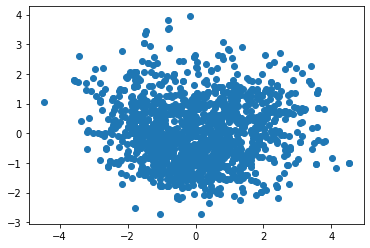

In [188]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )

In [ ]:
#El siguiente df es para crear el PCA con type=white

In [189]:
part2 = pd.DataFrame()

In [190]:
part2 = e2.loc[e2['type'] == "white" , ['new_alcohol', 'new_density', 'new_total sulfur dioxide', 'new_residual sugar', 'new_chlorides']]

In [191]:
part2

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides
0,8.8,1.00100,170.0,20.7,0.045
1,9.5,0.99400,132.0,1.6,0.049
2,10.1,0.99510,97.0,6.9,0.050
3,9.9,0.99560,186.0,8.5,0.058
4,9.9,0.99560,186.0,8.5,0.058
...,...,...,...,...,...
4893,11.2,0.99114,92.0,1.6,0.039
4894,9.6,0.99490,168.0,8.0,0.047
4895,9.4,0.99254,111.0,1.2,0.041
4896,12.8,0.98869,110.0,1.1,0.022


In [192]:
for c_ in part2.columns:
    print(c_)
    print(sum(pd.isnull( part2[c_] )))

new_alcohol
0
new_density
0
new_total sulfur dioxide
0
new_residual sugar
0
new_chlorides
0


In [193]:
y = part2.loc[ : , cols_to_use ].values

In [194]:
y

array([[8.8000e+00, 1.0010e+00, 4.5000e-02, 2.0700e+01, 1.7000e+02],
       [9.5000e+00, 9.9400e-01, 4.9000e-02, 1.6000e+00, 1.3200e+02],
       [1.0100e+01, 9.9510e-01, 5.0000e-02, 6.9000e+00, 9.7000e+01],
       ...,
       [9.4000e+00, 9.9254e-01, 4.1000e-02, 1.2000e+00, 1.1100e+02],
       [1.2800e+01, 9.8869e-01, 2.2000e-02, 1.1000e+00, 1.1000e+02],
       [1.1800e+01, 9.8941e-01, 2.0000e-02, 8.0000e-01, 9.8000e+01]])

In [195]:
y = StandardScaler().fit_transform(y) #Estandarizamos

In [196]:
y

array([[-1.39315246e+00,  2.41401062e+00,  2.67806308e-01,
         2.90040803e+00,  7.74561786e-01],
       [-8.24275678e-01, -2.62978632e-03,  6.80133318e-01,
        -9.60708104e-01, -1.45309565e-01],
       [-3.36667007e-01,  3.77127992e-01,  7.83215070e-01,
         1.10701084e-01, -9.92559495e-01],
       ...,
       [-9.05543789e-01, -5.06671929e-01, -1.44520701e-01,
        -1.04156917e+00, -6.53659523e-01],
       [ 1.85757201e+00, -1.83582415e+00, -2.10307400e+00,
        -1.06178444e+00, -6.77866664e-01],
       [ 1.04489089e+00, -1.58725543e+00, -2.30923750e+00,
        -1.12243025e+00, -9.68352354e-01]])

In [197]:
y = np.around( y , 2 )

In [198]:
np.nan_to_num(y)

array([[-1.39,  2.41,  0.27,  2.9 ,  0.77],
       [-0.82, -0.  ,  0.68, -0.96, -0.15],
       [-0.34,  0.38,  0.78,  0.11, -0.99],
       ...,
       [-0.91, -0.51, -0.14, -1.04, -0.65],
       [ 1.86, -1.84, -2.1 , -1.06, -0.68],
       [ 1.04, -1.59, -2.31, -1.12, -0.97]])

In [199]:
pca2 = PCA( n_components=2 )

In [200]:
#Si hubieran valores nulos esta parte no funcionaria
principalComponents2 = pca2.fit_transform(y) #Entrenamos

In [201]:
pcadf1 = pd.DataFrame(data=principalComponents2 ,columns=['c1','c2']) #Redimensionamos todas las variables a 2

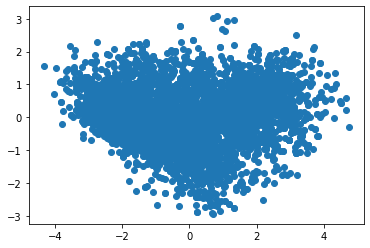

In [202]:
plt.scatter( pcadf1['c1'] , pcadf1['c2'] )

# Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)

In [ ]:
#Se crearan 3 perfiles para los type=red

In [203]:
km1 = KMeans( n_clusters=3  ).fit(pcadf) #pcadf es el que tiene la info del type = red

In [204]:
km1.cluster_centers_

array([[-0.02927936, -0.87391381],
       [ 1.64629231,  0.59229378],
       [-1.34345273,  0.58964665]])

In [205]:
km1.labels_

array([0, 2, 2, ..., 1, 0, 2])

In [206]:
pcadf

,c1,c2
0,-0.436096,-0.955050
1,-1.530580,0.288357
2,-1.023573,-0.133019
3,-0.558084,-0.992079
4,-0.436096,-0.955050
...,...,...
1594,0.479433,-0.247361
1595,1.420350,0.198717
1596,0.667306,0.523749
1597,0.628926,-0.534089


In [207]:
part1

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides
4898,9.4,0.99780,34.0,1.9,0.076
4899,9.8,0.99680,67.0,2.6,0.098
4900,9.8,0.99700,54.0,2.3,0.092
4901,9.8,0.99800,60.0,1.9,0.075
4902,9.4,0.99780,34.0,1.9,0.076
...,...,...,...,...,...
6492,10.5,0.99490,44.0,2.0,0.090
6493,11.2,0.99512,51.0,2.2,0.062
6494,11.0,0.99574,40.0,2.3,0.076
6495,10.2,0.99547,44.0,2.0,0.075


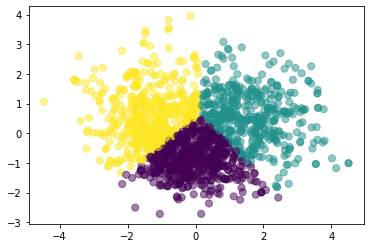

In [208]:
plt.scatter( pcadf['c1'] , pcadf['c2'] , c=km1.labels_.astype(float) , s=50, alpha=0.5 ) #Tenemos 3 perfiles

In [209]:
part1['ClusterRed'] = km1.labels_ #añadimos los perfiles a la parte 1 con type=red

In [210]:
part1

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterRed
4898,9.4,0.99780,34.0,1.9,0.076,0
4899,9.8,0.99680,67.0,2.6,0.098,2
4900,9.8,0.99700,54.0,2.3,0.092,2
4901,9.8,0.99800,60.0,1.9,0.075,0
4902,9.4,0.99780,34.0,1.9,0.076,0
...,...,...,...,...,...,...
6492,10.5,0.99490,44.0,2.0,0.090,0
6493,11.2,0.99512,51.0,2.2,0.062,1
6494,11.0,0.99574,40.0,2.3,0.076,1
6495,10.2,0.99547,44.0,2.0,0.075,0


In [211]:
part1.loc[ :  , ['ClusterRed']].value_counts()

ClusterRed
0             645
2             519
1             435
dtype: int64

In [212]:
#Comparare viendo el promedio y la mediana de cada perfil

In [213]:
part1.loc[ part1['ClusterRed'] == 0 , : ].describe() #Promedio = 9.79, Media = 9.70 de new_alcohol

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterRed
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.0
mean,9.794289,0.996665,46.703876,1.912636,0.077398,0.0
std,0.526865,0.000968,26.885597,0.249999,0.011154,0.0
min,8.400000,0.992940,6.000000,1.200000,0.044000,0.0
25%,9.400000,0.996040,25.000000,1.800000,0.071000,0.0
50%,9.700000,0.996720,40.000000,1.900000,0.078000,0.0
75%,10.100000,0.997280,63.000000,2.100000,0.082000,0.0
max,11.700000,1.000800,121.000000,2.500000,0.118000,0.0


In [214]:
part1.loc[ part1['ClusterRed'] == 1 , : ].describe() #Promedio = 11.6, Media = 9.70 de new_alcohol

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterRed
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.0
mean,11.610805,0.995128,30.664368,2.126322,0.068938,1.0
std,0.741758,0.001276,20.199751,0.362344,0.013003,0.0
min,9.500000,0.992350,6.000000,0.900000,0.041000,1.0
25%,11.000000,0.994255,16.000000,1.900000,0.060000,1.0
50%,11.500000,0.995140,26.000000,2.200000,0.068000,1.0
75%,12.200000,0.995930,40.000000,2.300000,0.078000,1.0
max,13.400000,1.000400,109.000000,3.600000,0.114000,1.0


In [215]:
part1.loc[ part1['ClusterRed'] == 2 , : ].describe() #Promedio = 10.1, Media = 10 de new_alcohol

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterRed
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.0
mean,10.109377,0.998170,47.712909,2.562813,0.088724,2.0
std,0.772149,0.001250,27.662550,0.368937,0.012441,0.0
min,8.400000,0.995440,8.000000,1.800000,0.060000,2.0
25%,9.500000,0.997200,25.000000,2.200000,0.079000,2.0
50%,10.000000,0.998080,40.000000,2.500000,0.087000,2.0
75%,10.600000,0.999125,67.000000,2.800000,0.096000,2.0
max,12.800000,1.001000,121.000000,3.650000,0.119000,2.0


In [216]:
#Vemos que en todos los perfiles los promedios con las medianas estan muy cercanas,
#por lo tanto el escalamiento hecho, fue bueno

#Vemos que en varios de los valores de las diferentes variables son similares, esto explicaria el porque en el grafico
#vemos que los perfiles estan pegados.

#Por ejmeplo vemos que la mediana del cluster 0 y 2 de "new_total sulfur dioxide" es exactamente igual
#Con esto sabemos que estos perfiles estan pegados.

In [ ]:
#Se crearan 3 perfiles para los type=white

In [217]:
km2 = KMeans( n_clusters=3  ).fit(pcadf1) #pcadf es el que tiene la info del type = white

In [218]:
km2.cluster_centers_

array([[ 2.08877834,  0.36939755],
       [-0.04170063, -0.66935299],
       [-1.91909343,  0.36315168]])

In [220]:
km2.labels_

array([0, 1, 1, ..., 1, 2, 2])

In [221]:
pcadf1

,c1,c2
0,3.638139,1.738461
1,0.162090,-1.246676
2,0.315154,-0.505782
3,1.768255,-0.942346
4,1.768255,-0.942346
...,...,...
4893,-1.785725,-0.397926
4894,1.123648,-0.245685
4895,-0.601507,-0.804194
4896,-3.384069,0.939823


In [222]:
part2

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides
0,8.8,1.00100,170.0,20.7,0.045
1,9.5,0.99400,132.0,1.6,0.049
2,10.1,0.99510,97.0,6.9,0.050
3,9.9,0.99560,186.0,8.5,0.058
4,9.9,0.99560,186.0,8.5,0.058
...,...,...,...,...,...
4893,11.2,0.99114,92.0,1.6,0.039
4894,9.6,0.99490,168.0,8.0,0.047
4895,9.4,0.99254,111.0,1.2,0.041
4896,12.8,0.98869,110.0,1.1,0.022


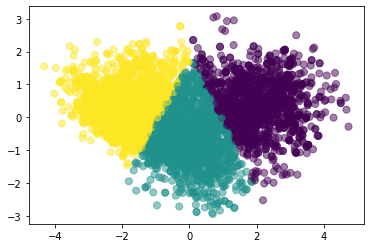

In [223]:
plt.scatter( pcadf1['c1'] , pcadf1['c2'] , c=km2.labels_.astype(float) , s=50, alpha=0.5 ) #Tenemos 3 perfiles

In [224]:
part2['ClusterWhite'] = km2.labels_ #añadimos los perfiles a la parte 2 con type=white

In [225]:
part2

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterWhite
0,8.8,1.00100,170.0,20.7,0.045,0
1,9.5,0.99400,132.0,1.6,0.049,1
2,10.1,0.99510,97.0,6.9,0.050,1
3,9.9,0.99560,186.0,8.5,0.058,0
4,9.9,0.99560,186.0,8.5,0.058,0
...,...,...,...,...,...,...
4893,11.2,0.99114,92.0,1.6,0.039,2
4894,9.6,0.99490,168.0,8.0,0.047,0
4895,9.4,0.99254,111.0,1.2,0.041,1
4896,12.8,0.98869,110.0,1.1,0.022,2


In [226]:
part2.loc[ :  , ['ClusterWhite']].value_counts()

ClusterWhite
1               1732
2               1634
0               1532
dtype: int64

In [ ]:
#Comparare viendo el promedio y la mediana de cada perfil

In [227]:
part2.loc[ part2['ClusterWhite'] == 0 , : ].describe() #Promedio = 9.43, Media = 9.3 de new_alcohol

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterWhite
count,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.0
mean,9.431647,0.997441,172.459530,12.136097,0.047445,0.0
std,0.587263,0.001469,34.701451,3.447895,0.007850,0.0
min,8.000000,0.994350,67.000000,1.600000,0.024000,0.0
25%,9.000000,0.996200,149.000000,9.200000,0.043000,0.0
50%,9.300000,0.997400,173.000000,12.175000,0.047000,0.0
75%,9.700000,0.998400,197.000000,14.500000,0.053000,0.0
max,12.300000,1.002410,255.000000,22.000000,0.071000,0.0


In [228]:
part2.loc[ part2['ClusterWhite'] == 1 , : ].describe() #Promedio = 10.2, Media = 10.2 de new_alcohol

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterWhite
count,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.0
mean,10.242050,0.993643,135.891744,3.968533,0.046462,1.0
std,0.750806,0.001323,32.592981,2.910502,0.007563,0.0
min,8.000000,0.989560,26.000000,0.700000,0.027000,1.0
25%,9.700000,0.992710,113.000000,1.500000,0.042000,1.0
50%,10.200000,0.993700,134.000000,2.700000,0.045500,1.0
75%,10.800000,0.994600,158.250000,6.100000,0.051000,1.0
max,13.400000,0.998000,249.500000,15.200000,0.071000,1.0


In [229]:
part2.loc[ part2['ClusterWhite'] == 2 , : ].describe() #Promedio = 11.8, Media = 11.9 de new_alcohol

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterWhite
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.0
mean,11.817850,0.991176,107.934517,3.456548,0.033370,2.0
std,0.861402,0.001438,28.987739,2.733265,0.006396,0.0
min,9.100000,0.987110,21.000000,0.600000,0.015000,2.0
25%,11.200000,0.990160,89.000000,1.400000,0.029000,2.0
50%,11.900000,0.991100,107.000000,2.250000,0.034000,2.0
75%,12.500000,0.992000,126.000000,4.900000,0.038000,2.0
max,14.200000,0.996450,216.000000,15.500000,0.053000,2.0


In [ ]:
#Vemos que en todos los perfiles los promedios con las medianas estan muy cercanas,
#por lo tanto el escalamiento hecho, fue bueno

#Vemos que en varios de los valores de las diferentes variables son similares, esto explicaria el porque en el grafico
#vemos que los perfiles estan pegados.

#Por ejmeplo vemos que la mediana y promedio de varias variables en el perfil 0 y 1 estan muy alejados
#aqui veriamos los 2 perfiles opuestos en el grafico

# Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.

In [230]:
A_F #DS con la ultima informacion

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density,new_alcohol
0,white,7.0,0.270,0.36,3.00,0.45,6,20.7,0.045,45.0,170.0,1.00100,8.8
1,white,6.3,0.300,0.34,3.30,0.49,6,1.6,0.049,14.0,132.0,0.99400,9.5
2,white,8.1,0.280,0.40,3.26,0.44,6,6.9,0.050,30.0,97.0,0.99510,10.1
3,white,7.2,0.230,0.32,3.19,0.40,6,8.5,0.058,47.0,186.0,0.99560,9.9
4,white,7.2,0.230,0.32,3.19,0.40,6,8.5,0.058,47.0,186.0,0.99560,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,5,2.0,0.090,32.0,44.0,0.99490,10.5
6493,red,5.9,0.550,0.10,3.52,0.58,6,2.2,0.062,39.0,51.0,0.99512,11.2
6494,red,6.3,0.510,0.13,3.42,0.75,6,2.3,0.076,29.0,40.0,0.99574,11.0
6495,red,5.9,0.645,0.12,3.57,0.71,5,2.0,0.075,32.0,44.0,0.99547,10.2


In [ ]:
#Añadire una nueva columna con el mismo nombre en ambas partes del PCA, esto para poder unir todos los perfiles en uno solo.

In [231]:
part1['Cluster'] = part1['ClusterRed']

In [232]:
part1

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterRed,Cluster
4898,9.4,0.99780,34.0,1.9,0.076,0,0
4899,9.8,0.99680,67.0,2.6,0.098,2,2
4900,9.8,0.99700,54.0,2.3,0.092,2,2
4901,9.8,0.99800,60.0,1.9,0.075,0,0
4902,9.4,0.99780,34.0,1.9,0.076,0,0
...,...,...,...,...,...,...,...
6492,10.5,0.99490,44.0,2.0,0.090,0,0
6493,11.2,0.99512,51.0,2.2,0.062,1,1
6494,11.0,0.99574,40.0,2.3,0.076,1,1
6495,10.2,0.99547,44.0,2.0,0.075,0,0


In [233]:
partx = part1.loc[: , ['Cluster']]

In [234]:
partx

,Cluster
4898,0
4899,2
4900,2
4901,0
4902,0
...,...
6492,0
6493,1
6494,1
6495,0


In [235]:
part2['Cluster'] = part2['ClusterWhite']

In [236]:
part2

,new_alcohol,new_density,new_total sulfur dioxide,new_residual sugar,new_chlorides,ClusterWhite,Cluster
0,8.8,1.00100,170.0,20.7,0.045,0,0
1,9.5,0.99400,132.0,1.6,0.049,1,1
2,10.1,0.99510,97.0,6.9,0.050,1,1
3,9.9,0.99560,186.0,8.5,0.058,0,0
4,9.9,0.99560,186.0,8.5,0.058,0,0
...,...,...,...,...,...,...,...
4893,11.2,0.99114,92.0,1.6,0.039,2,2
4894,9.6,0.99490,168.0,8.0,0.047,0,0
4895,9.4,0.99254,111.0,1.2,0.041,1,1
4896,12.8,0.98869,110.0,1.1,0.022,2,2


In [237]:
party = part2.loc[: , ['Cluster']]

In [238]:
party

,Cluster
0,0
1,1
2,1
3,0
4,0
...,...
4893,2
4894,0
4895,1
4896,2


In [ ]:
#Unimos las columnas "Cluster" poniendo una sobre la otra

In [239]:
partF = pd.concat([partx, party], axis=0)

In [240]:
partF

,Cluster
4898,0
4899,2
4900,2
4901,0
4902,0
...,...
4893,2
4894,0
4895,1
4896,2


In [ ]:
#Por ultimo unimos la columna "Cluster" al df donde estan todas las variables limpias.

In [241]:
DFE = pd.concat([A_F, partF], axis=1)

In [242]:
DFE

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_density,new_alcohol,Cluster
0,white,7.0,0.270,0.36,3.00,0.45,6,20.7,0.045,45.0,170.0,1.00100,8.8,0
1,white,6.3,0.300,0.34,3.30,0.49,6,1.6,0.049,14.0,132.0,0.99400,9.5,1
2,white,8.1,0.280,0.40,3.26,0.44,6,6.9,0.050,30.0,97.0,0.99510,10.1,1
3,white,7.2,0.230,0.32,3.19,0.40,6,8.5,0.058,47.0,186.0,0.99560,9.9,0
4,white,7.2,0.230,0.32,3.19,0.40,6,8.5,0.058,47.0,186.0,0.99560,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,5,2.0,0.090,32.0,44.0,0.99490,10.5,0
6493,red,5.9,0.550,0.10,3.52,0.58,6,2.2,0.062,39.0,51.0,0.99512,11.2,1
6494,red,6.3,0.510,0.13,3.42,0.75,6,2.3,0.076,29.0,40.0,0.99574,11.0,1
6495,red,5.9,0.645,0.12,3.57,0.71,5,2.0,0.075,32.0,44.0,0.99547,10.2,0


In [ ]:
#Eliminamos las columnas que formaron parte del PCA

In [265]:
DFF = DFE.loc[: , ['type', "fixed acidity", "volatile acidity", "citric acid", "pH", "sulphates", 'quality', "new_free sulfur dioxide", "Cluster"]]

In [266]:
DFF

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_free sulfur dioxide,Cluster
0,white,7.0,0.270,0.36,3.00,0.45,6,45.0,0
1,white,6.3,0.300,0.34,3.30,0.49,6,14.0,1
2,white,8.1,0.280,0.40,3.26,0.44,6,30.0,1
3,white,7.2,0.230,0.32,3.19,0.40,6,47.0,0
4,white,7.2,0.230,0.32,3.19,0.40,6,47.0,0
...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,5,32.0,0
6493,red,5.9,0.550,0.10,3.52,0.58,6,39.0,1
6494,red,6.3,0.510,0.13,3.42,0.75,6,29.0,1
6495,red,5.9,0.645,0.12,3.57,0.71,5,32.0,0


# Crea la varible de respuesta de la siguiente manera:
    #if quality >= 5 ? 1 else 0

In [ ]:
#Hay que generar la variable de respuesta (Outcome)

In [267]:
DFF

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_free sulfur dioxide,Cluster
0,white,7.0,0.270,0.36,3.00,0.45,6,45.0,0
1,white,6.3,0.300,0.34,3.30,0.49,6,14.0,1
2,white,8.1,0.280,0.40,3.26,0.44,6,30.0,1
3,white,7.2,0.230,0.32,3.19,0.40,6,47.0,0
4,white,7.2,0.230,0.32,3.19,0.40,6,47.0,0
...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,5,32.0,0
6493,red,5.9,0.550,0.10,3.52,0.58,6,39.0,1
6494,red,6.3,0.510,0.13,3.42,0.75,6,29.0,1
6495,red,5.9,0.645,0.12,3.57,0.71,5,32.0,0


In [268]:
DFF['Outcome'] = np.where(DFF['quality'] >= 5, 1, 0) #Otra forma de crear la condicion haciendo uso de numpy, envez del if

In [269]:
DFF

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,quality,new_free sulfur dioxide,Cluster,Outcome
0,white,7.0,0.270,0.36,3.00,0.45,6,45.0,0,1
1,white,6.3,0.300,0.34,3.30,0.49,6,14.0,1,1
2,white,8.1,0.280,0.40,3.26,0.44,6,30.0,1,1
3,white,7.2,0.230,0.32,3.19,0.40,6,47.0,0,1
4,white,7.2,0.230,0.32,3.19,0.40,6,47.0,0,1
...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,5,32.0,0,1
6493,red,5.9,0.550,0.10,3.52,0.58,6,39.0,1,1
6494,red,6.3,0.510,0.13,3.42,0.75,6,29.0,1,1
6495,red,5.9,0.645,0.12,3.57,0.71,5,32.0,0,1


In [271]:
DFF.loc[: , ['quality']].value_counts() #Vemos que la gran mayoria son iguales o mayores a 5

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
dtype: int64

In [270]:
DFF.loc[: , ['Outcome']].value_counts() #Vemos aqui que es correcto

Outcome
1          6251
0           246
dtype: int64

# Elimine la variable quality del dataset

In [272]:
Entrenamiento = DFF.loc[: , ['type', "fixed acidity", "volatile acidity", "citric acid", "pH", "sulphates", "new_free sulfur dioxide", "Cluster", 'Outcome']]

In [273]:
Entrenamiento #Ya no esta quality

,type,fixed acidity,volatile acidity,citric acid,pH,sulphates,new_free sulfur dioxide,Cluster,Outcome
0,white,7.0,0.270,0.36,3.00,0.45,45.0,0,1
1,white,6.3,0.300,0.34,3.30,0.49,14.0,1,1
2,white,8.1,0.280,0.40,3.26,0.44,30.0,1,1
3,white,7.2,0.230,0.32,3.19,0.40,47.0,0,1
4,white,7.2,0.230,0.32,3.19,0.40,47.0,0,1
...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,3.45,0.58,32.0,0,1
6493,red,5.9,0.550,0.10,3.52,0.58,39.0,1,1
6494,red,6.3,0.510,0.13,3.42,0.75,29.0,1,1
6495,red,5.9,0.645,0.12,3.57,0.71,32.0,0,1


# Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    

In [ ]:
#Dado que durante toda la limpieza y creacion de perfiles hemos estratificada por type
#Veo mejor realizar lo mismo aqui, por otra parte ya esta hecha la clusterizacion que al momento de unirlo
#todo en una sola columna esta quedo una sobre la otra, asi que al momento de estratificar quedara todo bien de nuevo.

# Regresion Logistica

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [ ]:
#Entrenamiento para type = red

In [353]:
RL1 = Entrenamiento.loc[Entrenamiento['type'] == "red" , ["fixed acidity", "volatile acidity", "citric acid", "pH", "sulphates", "new_free sulfur dioxide", "Cluster", 'Outcome']]

In [354]:
RL1

,fixed acidity,volatile acidity,citric acid,pH,sulphates,new_free sulfur dioxide,Cluster,Outcome
4898,7.4,0.700,0.00,3.51,0.56,11.0,0,1
4899,7.8,0.880,0.00,3.20,0.68,25.0,2,1
4900,7.8,0.760,0.04,3.26,0.65,15.0,2,1
4901,11.2,0.280,0.56,3.16,0.58,17.0,0,1
4902,7.4,0.700,0.00,3.51,0.56,11.0,0,1
...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,3.45,0.58,32.0,0,1
6493,5.9,0.550,0.10,3.52,0.58,39.0,1,1
6494,6.3,0.510,0.13,3.42,0.75,29.0,1,1
6495,5.9,0.645,0.12,3.57,0.71,32.0,0,1


In [355]:
features_col1 = RL1.columns.values[0:7]

In [356]:
X = RL1[features_col1].values
y = RL1["Outcome"].values

In [357]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [358]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000) #Dejaremos el numero de iteraciones en 1000
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [359]:
y_pred  = log_model.predict(X_test)

In [360]:
y_pred #Prediccion

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [361]:
Y_test #Real

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [362]:
log_model.predict_proba(X_test)[:] #Vemos que la probabilidad de prediccion en todas se inclina hacia el 1

array([[0.02065519, 0.97934481],
       [0.09066521, 0.90933479],
       [0.01263183, 0.98736817],
       [0.05601263, 0.94398737],
       [0.02974483, 0.97025517],
       [0.04621929, 0.95378071],
       [0.0633623 , 0.9366377 ],
       [0.01565842, 0.98434158],
       [0.17480051, 0.82519949],
       [0.06218873, 0.93781127],
       [0.03407525, 0.96592475],
       [0.04290253, 0.95709747],
       [0.02769232, 0.97230768],
       [0.15318071, 0.84681929],
       [0.0371397 , 0.9628603 ],
       [0.0091214 , 0.9908786 ],
       [0.01459164, 0.98540836],
       [0.01544089, 0.98455911],
       [0.05170943, 0.94829057],
       [0.05683781, 0.94316219],
       [0.05732913, 0.94267087],
       [0.03588609, 0.96411391],
       [0.03949894, 0.96050106],
       [0.01769754, 0.98230246],
       [0.02334401, 0.97665599],
       [0.0371706 , 0.9628294 ],
       [0.03147116, 0.96852884],
       [0.01326906, 0.98673094],
       [0.01028376, 0.98971624],
       [0.04505801, 0.95494199],
       [0.

In [363]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred) #matriz de confusion

Text(0.5, 257.44, 'Etiqueta de prediccion')

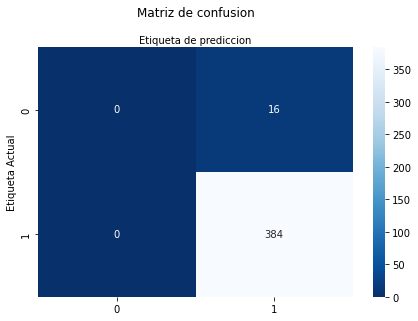

In [364]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [ ]:
#Vemos que en la matriz hay pocos falsos positivos y que su gran moyoria verdad positivos, esto nos dice que el entrenamiento
#a sido bastante bueno, por otra parte entendiendo esto, nos dice que la mayoria de vinos rojos son de buena calidad.

In [365]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.96
0.96
1.0
0.9795918367346939


In [ ]:
# Exactitud del modelo = 96%
# Precision del modelo = 96%
# Sencibilidad = 100%
# Balancelo = 97%

In [ ]:
#Entrenamiento para type = white

In [290]:
RL2 = Entrenamiento.loc[Entrenamiento['type'] == "white" , ["fixed acidity", "volatile acidity", "citric acid", "pH", "sulphates", "new_free sulfur dioxide", "Cluster", 'Outcome']]

In [292]:
RL2

,fixed acidity,volatile acidity,citric acid,pH,sulphates,new_free sulfur dioxide,Cluster,Outcome
0,7.0,0.27,0.36,3.00,0.45,45.0,0,1
1,6.3,0.30,0.34,3.30,0.49,14.0,1,1
2,8.1,0.28,0.40,3.26,0.44,30.0,1,1
3,7.2,0.23,0.32,3.19,0.40,47.0,0,1
4,7.2,0.23,0.32,3.19,0.40,47.0,0,1
...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,3.27,0.50,24.0,2,1
4894,6.6,0.32,0.36,3.15,0.46,57.0,0,1
4895,6.5,0.32,0.19,2.99,0.46,30.0,1,1
4896,5.5,0.29,0.30,3.34,0.38,20.0,2,1


In [298]:
features_col2 = RL2.columns.values[0:7]

In [299]:
X2 = RL2[features_col2].values
y2 = RL2["Outcome"].values

In [300]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,y2,test_size = 0.25, random_state=0)

In [301]:
log_model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model2.fit(X_train,Y_train) #Entrenamiento

LogisticRegression(max_iter=1000)

In [302]:
y_pred2  = log_model2.predict(X_test2)

In [303]:
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [304]:
Y_test2

array([1, 1, 1, ..., 1, 1, 0])

In [305]:
log_model2.predict_proba(X_test2)[:] 

array([[0.0144071 , 0.9855929 ],
       [0.00885825, 0.99114175],
       [0.00328518, 0.99671482],
       ...,
       [0.00518038, 0.99481962],
       [0.00373587, 0.99626413],
       [0.0319314 , 0.9680686 ]])

In [306]:
cnf_matrix2 = metrics.confusion_matrix(Y_test2, y_pred2)

Text(0.5, 257.44, 'Etiqueta de prediccion')

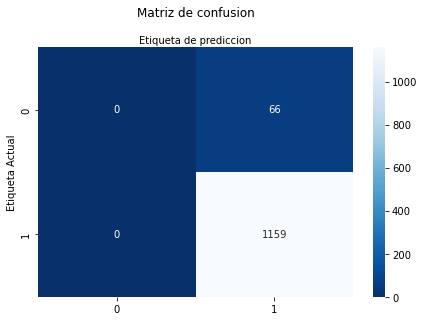

In [307]:
class_names2 = [0,1]
fig, ax = plt.subplots()
tick_marks2 = np.arange(len(class_names2))
plt.xticks(tick_marks2, class_names2)
plt.yticks(tick_marks2, class_names2)

sns.heatmap(pd.DataFrame(cnf_matrix2), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [ ]:
#Vemos que en la matriz hay pocos falsos positivos y que su gran moyoria verdad positivos

In [308]:
print(metrics.accuracy_score(Y_test2,y_pred2))
print(precision_score(Y_test2, y_pred2))
print(recall_score(Y_test2, y_pred2))
print(f1_score(Y_test2, y_pred2))

0.9461224489795919
0.9461224489795919
1.0
0.9723154362416108


In [ ]:
# Exactitud del modelo = 94%
# Precision del modelo = 94%
# Sencibilidad = 100%
# Balancelo = 97%

# NN

In [309]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#Entrenamiento para type = red

In [366]:
x_trainNN = X_train 
x_testNN = X_test
y_trainNN = Y_train
y_testNN =  Y_test 
#Copio los valores de RL type red para luego poder compararlos

In [367]:
# Making the Neural Network Classifier
NN1 = MLPClassifier(random_state=1, max_iter=3000)

# Training the model on the training data and labels
NN1.fit(x_trainNN, y_trainNN)

# Testing the model i.e. predicting the labels of the test data.
y_predNN = NN1.predict(x_testNN)

# Evaluating the results of the model
accuracy = accuracy_score(y_testNN,y_predNN)*100
confusion_mat = confusion_matrix(y_testNN,y_predNN)

In [368]:
print(metrics.accuracy_score(y_testNN,y_predNN))
print(precision_score(y_testNN, y_predNN))
print(recall_score(y_testNN, y_predNN))
print(f1_score(y_testNN, y_predNN))

0.96
0.96
1.0
0.9795918367346939


In [ ]:
# Exactitud del modelo = 96%
# Precision del modelo = 96%
# Sencibilidad = 100%
# Balancelo = 97%

In [ ]:
#Entrenamiento para type = white

In [369]:
x_trainNN2 = X_train2 
x_testNN2 = X_test2
y_trainNN2 = Y_train2
y_testNN2 =  Y_test2 
#Copio los valores de RL type white para luego poder compararlos

In [370]:
# Making the Neural Network Classifier
NN2 = MLPClassifier(random_state=1, max_iter=3000)

# Training the model on the training data and labels
NN2.fit(x_trainNN2, y_trainNN2)

# Testing the model i.e. predicting the labels of the test data.
y_predNN2 = NN2.predict(x_testNN2)

# Evaluating the results of the model
accuracy = accuracy_score(y_testNN2,y_predNN2)*100
confusion_mat = confusion_matrix(y_testNN2,y_predNN2)

In [371]:
print(metrics.accuracy_score(y_testNN2,y_predNN2))
print(precision_score(y_testNN2, y_predNN2))
print(recall_score(y_testNN2, y_predNN2))
print(f1_score(y_testNN2, y_predNN2))

0.9461224489795919
0.946852003270646
0.999137187230371
0.9722921914357682


In [ ]:
# Exactitud del modelo = 94%
# Precision del modelo = 94%
# Sencibilidad = 99%
# Balancelo = 97%

# Arboles de desiciones

In [329]:
from sklearn import tree

In [ ]:
#Entrenamiento para type = red

In [331]:
tree_one1 = tree.DecisionTreeClassifier(random_state=1)

In [333]:
tree_one1 = tree_one1.fit( x_train , y_train ) #Usamos los mismos valores de los demas entrenamientos type red

In [334]:
tree_one1.tree_.max_depth #Hay 15 niveles de nodo

15

In [335]:
y_pred = tree_one1.predict(x_test)

In [336]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9175
0.9606299212598425
0.953125
0.9568627450980391


In [ ]:
# Exactitud del modelo = 91%
# Precision del modelo = 96%
# Sencibilidad = 95%
# Balancelo = 95%

In [ ]:
#Entrenamiento para type = white

In [338]:
tree_one2 = tree.DecisionTreeClassifier(random_state=1)

In [340]:
tree_one2 = tree_one2.fit( x_trainNN2 , y_trainNN2 )#Usamos los mismos valores de los demas entrenamientos type white

In [341]:
tree_one2.tree_.max_depth

20

In [342]:
y_predNN2 = tree_one2.predict(x_testNN2)

In [343]:
print(metrics.accuracy_score(y_testNN2,y_predNN2))
print(precision_score(y_testNN2, y_predNN2))
print(recall_score(y_testNN2, y_predNN2))
print(f1_score(y_testNN2, y_predNN2))

0.9346938775510204
0.9599317988064792
0.9715271786022434
0.9656946826758148


In [ ]:
# Exactitud del modelo = 93%
# Precision del modelo = 95%
# Sencibilidad = 97%
# Balancelo = 96%

# Random Forest

In [344]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Entrenamiento para type = red

In [346]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42) #Generamos 1000 arboles en 42 veces
# Train the model on training data
rf.fit(x_train , y_train);

In [347]:
y_pred = rf.predict(x_test) >= 0.5 #Prediccion

In [348]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.95
0.9595959595959596
0.9895833333333334
0.9743589743589745


In [ ]:
# Exactitud del modelo = 95%
# Precision del modelo = 95%
# Sencibilidad = 98%
# Balancelo = 97%

In [ ]:
#Entrenamiento para type = white

In [350]:
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf2.fit(x_trainNN2 , y_trainNN2);

In [351]:
y_predNN2 = rf2.predict(x_testNN2) >= 0.5

In [352]:
print(metrics.accuracy_score(y_testNN2,y_predNN2))
print(precision_score(y_testNN2, y_predNN2))
print(recall_score(y_testNN2, y_predNN2))
print(f1_score(y_testNN2, y_predNN2))

0.9518367346938775
0.9560530679933665
0.994823123382226
0.9750528541226215


In [ ]:
# Exactitud del modelo = 95%
# Precision del modelo = 95%
# Sencibilidad = 99%
# Balancelo = 97%

# Explique cual de los entrenamientos fue el mejor?

In [ ]:
#Comenzare estudiando los entrenamiendo para type=red

Regresion logistica
# Exactitud del modelo = 96%
# Precision del modelo = 96%
# Sencibilidad = 100%
# Balancelo = 97%

NN
# Exactitud del modelo = 96%
# Precision del modelo = 96%
# Sencibilidad = 100%
# Balancelo = 97%

Arboles de dicision
# Exactitud del modelo = 91%
# Precision del modelo = 96%
# Sencibilidad = 95%
# Balancelo = 95%

Random Forest
# Exactitud del modelo = 95%
# Precision del modelo = 95%
# Sencibilidad = 98%
# Balancelo = 97%

#Vemos que para el entrenamiento type=red la REGRESION LOGISTICA Y NN fueron los mejores, dandones exactamente los mismos valores
#y mas importante una sencibilidad (Recall) de 100%

---------------------------------------------------------------------------------
#Entrenamiendo para type=white

Regresion logistica
# Exactitud del modelo = 94%
# Precision del modelo = 94%
# Sencibilidad = 100%
# Balancelo = 97%

NN
# Exactitud del modelo = 94%
# Precision del modelo = 94%
# Sencibilidad = 99%
# Balancelo = 97%

Arboles de dicision
# Exactitud del modelo = 93%
# Precision del modelo = 95%
# Sencibilidad = 97%
# Balancelo = 96%

Random Forest
# Exactitud del modelo = 95%
# Precision del modelo = 95%
# Sencibilidad = 99%
# Balancelo = 97%

#Vemos que para el entrenamiento type=white la REGRESION LOGISTICA es de las mejores tecnicas de entrenamiento, seguida por
#RANDOM FOREST Y NN, como ya dije si vemos la sencibilidad la RERESION LOGISTICA es la que predomina